In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import glob
import numpy as np
import stephane.display.graphes as graphes
#import stephane.elasticity.processing as proc
import fluids2d.backlight as bl
import pims
import lea.danjruth.piv as piv
import lea.danjruth.piv_volume as piv_v


import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable

import os
import stephane.cine.cine as cine
import stephane.tools.Smath as Smath
import scipy.interpolate as interp
import sys

import stephane.analysis.cdata as cdata

import lea.hdf5.h5py_convert as h5pylea
import lea.data.Data as ldata

import lea.mesure.Mesure as mesure
import lea.mesure.Volume as lvolume
import lea.mesure.Piv3D as lpiv3d


In [3]:
date = '181106'
savefolder = '/Users/stephane/Documents/JRC_ENS/Data/Turbulence3d/'+date+'/'
folder = '/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/'
f = '/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/Volume/'
folderV = glob.glob(f+'*')[0]+'/'
print(folderV)

/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/Volume/Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5/


In [4]:
ext = '.hdf5'
l=glob.glob(folderV+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

#s = input()
#try:
#    i = int(s)
#except:
#    print("cannot be converted to an integer")

#mesurefile = l[i]

0 : Mesure_6361_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
1 : Mesure_6362_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
2 : Mesure_6363_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
3 : Mesure_6364_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
4 : Mesure_6365_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
5 : Mesure_6366_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
6 : Mesure_6367_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
7 : Mesure_6368_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
8 : Mesure_6369_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
9 : Mesure_636_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_li

In [9]:
cinefile = glob.glob(folder+'*.cine')[0]

In [10]:
os.path.basename(cinefile)

'PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine'

In [5]:
Vlist = []
for filename in l:
    f = h5pylea.ouverture_fichier(filename)
    Vlist.append(h5pylea.h5py_in_Volume(f))
    f.close()
#M = h5pylea.h5py_in_Mesure(f)
#f.close()#ouvrir un data à partir d'un hdf5 existant

<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>
<class 'module'>


In [6]:
Vlist[i].m['volume'].shape

(21, 384, 1024)

In [7]:
import lea.danjruth.piv_volume as piv_v

In [22]:
piv3d_data = piv_v.PIVDataProcessing(folder,os.path.basename(cinefile),folderV)

In [23]:
piv3d_data.get_volume(2).m['volume'].shape

<class 'module'>


(21, 384, 1024)

In [24]:
i=0
piv3d_data = piv3d_data.volume_analysis(i)

<class 'module'>
<class 'module'>
Process along xy
2 18
16 23 63
Process along xz
1 23 1020
Process along yz
1 380 63


In [50]:
piv3d = lpiv3d.Piv3D(Vlist[0].data)
piv3d.get_name()
piv3d.m={}
for key in piv3d_data.__dict__.keys():
    piv3d.m[key]=getattr(piv3d_data,key)
#piv3d.add_measurement(piv3d_data,'piv_volume')

In [51]:
piv3d_data.__dict__.keys()

dict_keys(['cine_filepath', 'parent_folder', 'cine_name', 'volume_folder', 'maskers', 'crop_lims', 'cine_frame_shape', 'window_size', 'overlap', 'search_area_size', 'frame_diff', 'dx', 'dt_orig', 'origin_pos', 'dt_ab', 'flow_field_res_filepath', 'name_for_save', 'Ux_3d', 'Uy_3d', 'Ux_xz', 'Uz_xz', 'Uy_yz', 'Uz_yz'])

In [52]:
piv3d.m.keys()

dict_keys(['cine_filepath', 'parent_folder', 'cine_name', 'volume_folder', 'maskers', 'crop_lims', 'cine_frame_shape', 'window_size', 'overlap', 'search_area_size', 'frame_diff', 'dx', 'dt_orig', 'origin_pos', 'dt_ab', 'flow_field_res_filepath', 'name_for_save', 'Ux_3d', 'Uy_3d', 'Ux_xz', 'Uz_xz', 'Uy_yz', 'Uz_yz'])

In [56]:
M = mesure.Mesure(piv3d.data)
M.add_measurement(piv3d)
M.add_measurement(Vlist[i])

In [57]:
f = h5pylea.file_name_in_dir(M, savefolder)
h5pylea.obj_in_h5py(M,f)
f.close()

[b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  30  27 ...  32  51  45]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  31  29 ...  33  34  36]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  28  27 ...  31  32  33]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  30  30 ...  31  32  34]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  34  33 ...  31  31  34]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  32  31 ...  31  32  33]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b

SPerrard
20181106
0000
{}
{'cine_filepath': '/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine', 'parent_folder': '/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/', 'cine_name': 'PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine', 'volume_folder': '/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/Volume/Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5/', 'maskers': None, 'crop_lims': None, 'cine_frame_shape': None, 'window_size': 32, 'overlap': 16, 'search_area_size': 64, 'frame_diff': 1, 'dx': 1, 'dt_orig': 1, 'origin_pos': None, 'dt_ab': 1, 'flow_field_res_filepath': None, 'name_for_save': 'PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.cine', 'Ux_3d': array([[[-2.05993652e-04, -1.26794815e-01, -9.98954773e-02, ...,
         -7.47470856e-02, -2.37312317e-02,  1.68199539e-02],
        [-3.28063965e-04, -1.8

[array([255,  30,  27, ...,  32,  51,  45], dtype=uint8), array([255,  31,  29, ...,  33,  34,  36], dtype=uint8), array([255,  28,  27, ...,  31,  32,  33], dtype=uint8), array([255,  30,  30, ...,  31,  32,  34], dtype=uint8), array([255,  34,  33, ...,  31,  31,  34], dtype=uint8), array([255,  32,  31, ...,  31,  32,  33], dtype=uint8), array([255,  30,  31, ...,  31,  29,  28], dtype=uint8), array([255,  30,  31, ...,  37,  31,  30], dtype=uint8), array([255,  29,  33, ...,  34,  31,  28], dtype=uint8), array([255,  35,  34, ...,  29,  32,  31], dtype=uint8), array([255,  31,  32, ...,  28,  36,  33], dtype=uint8), array([255,  28,  33, ...,  27,  32,  38], dtype=uint8), array([255,  33,  30, ...,  28,  34,  36], dtype=uint8), array([255,  27,  33, ...,  30,  44,  44], dtype=uint8), array([255,  35,  34, ...,  31,  38,  35], dtype=uint8), array([255,  32,  41, ...,  38,  64,  37], dtype=uint8), array([255,  36,  27, ...,  36,  36,  34], dtype=uint8), array([255,  31,  28, ...,  30

0.277
Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera
40
48
44
152.6
73.6
0
0
70
(40,40,63)
Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast
3d
50mm
16
40k
30Hz
1kHz
1600mV
5
[]
1
Non spécifié
SPerrard
20181106
0000
{}
{'volume': array([[[1020.,  119.,  114., ...,  128.,  120.,  125.],
        [1020.,  104.,  110., ...,  122.,  125.,  123.],
        [1020.,  124.,   95., ...,  121.,  112.,  116.],
        ...,
        [1020.,  128.,  152., ...,  161.,  176.,  182.],
        [1020.,  147.,  174., ...,  189.,  307.,  254.],
        [1020.,  141.,  155., ...,  182.,  341.,  270.]],

       [[1020.,  101.,  114., ...,  116.,  122.,  113.],
        [1020.,  106.,  112., ...,  118.,  135.,  115.],
        [1020.,  120.,   99., ...,  125.,  112.,  126.],
        ...,
        [1020.,  138.,  140., ...,  163.,  171.,  182.],
        [1020.,  141.,  167., ...,  170.,  282.,  228.],
        [1020.,  151.,  1

In [58]:
### The rest of this notebook is for testing, a priori useless. 
#For proof of principle and testing of 3d piv, see Piv3d_volumeprocess_proof_of_principle

In [91]:
Vlist[0].m['volume'].shape

(21, 384, 1024)

In [17]:
savefolder = savefolder + 'test_volume/thirdcomponent/'
os.makedirs(savefolder)

{3: {'fignum': '_vs_', 'data': {}}}

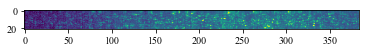

<Figure size 432x288 with 0 Axes>

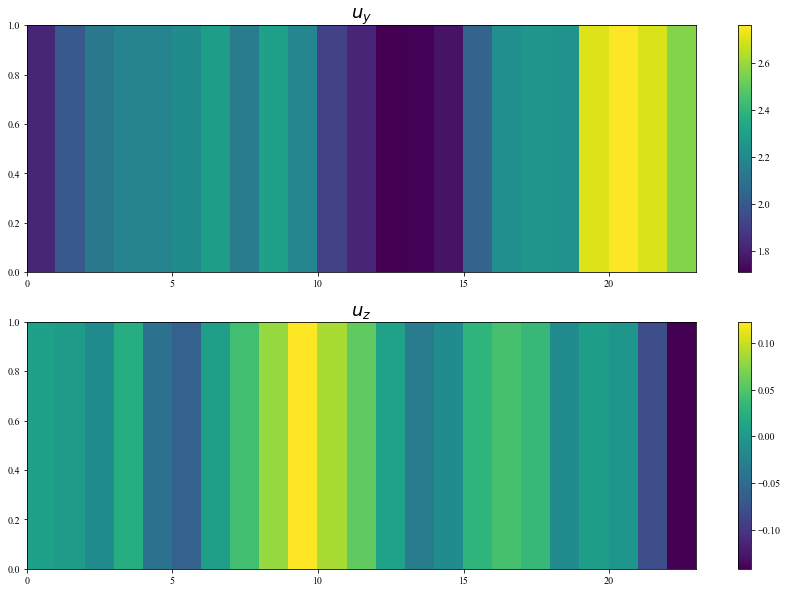

In [17]:
Vlist[0].m['volume'].shape

window_size = [16,32]
overlap = [8,16]
dt = 1

s2n_thresh = 1.1


i=10

k=200

a=2
frame_a = np.nanmean(Vlist[0].m['volume'][...,k-a:k+a+1],axis=2).astype(np.int32)
frame_b = np.nanmean(Vlist[4].m['volume'][...,k-a:k+a+1],axis=2).astype(np.int32)

#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )
#u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = s2n_thresh )

#fig,axs=plt.subplots(1,2,figsize=(15,10))
#plt.subplot(1,2,1)

k = 200
a=2

for t in range(0,10,2):
    frame = np.nanmean(Vlist[t].m['volume'][...,k-a:k+a+1].astype(np.int32),axis=2)
    plt.imshow(frame)
    filename = savefolder + 'avg_'+str(a*2+1) + '_' + str(t)
    graphes.save_fig(1,filename,frmt='png',dpi=300,overwrite=False)


filename = savefolder + 'b'
graphes.save_fig(2,filename,frmt='png',dpi=300,overwrite=False)

fig,axs=plt.subplots(2,1,figsize=(15,10))
plt.subplot(2,1,1)
plt.pcolormesh(u)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_y$')

plt.subplot(2,1,2)
plt.pcolormesh(v)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_z$')


test ...
1
process serie ...


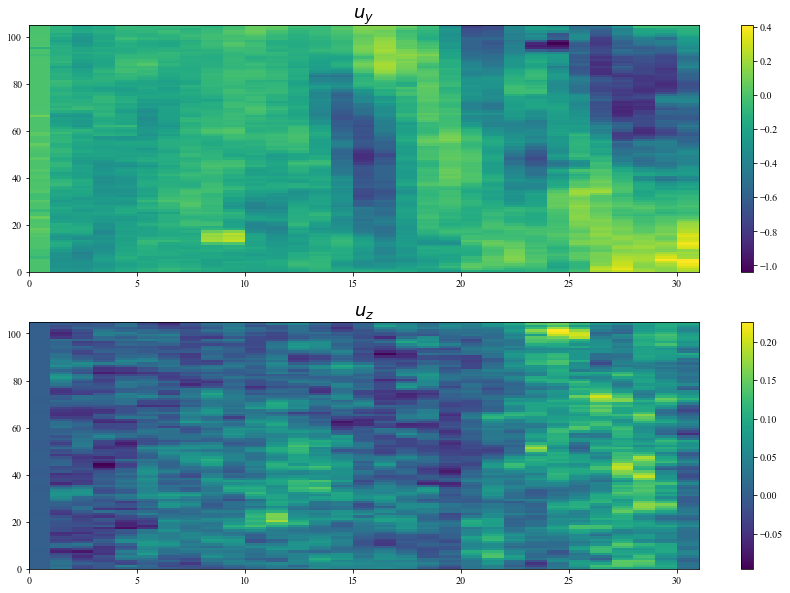

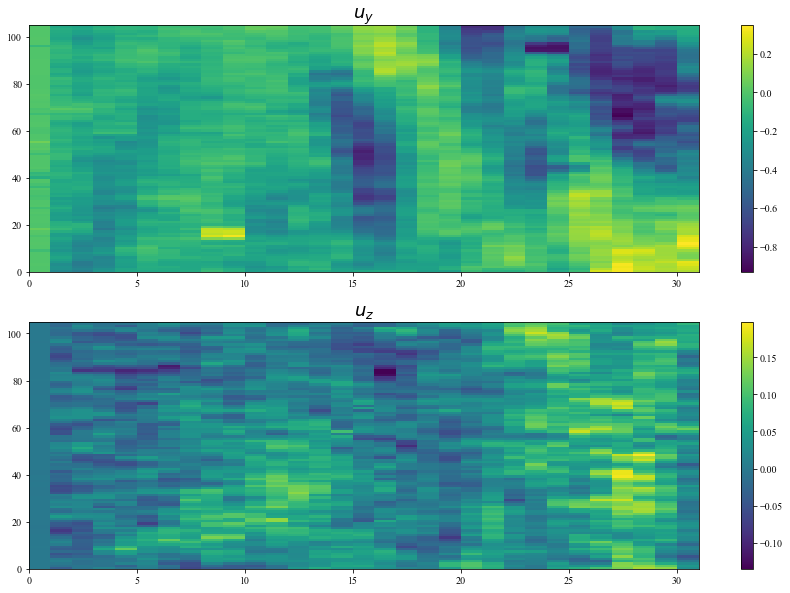

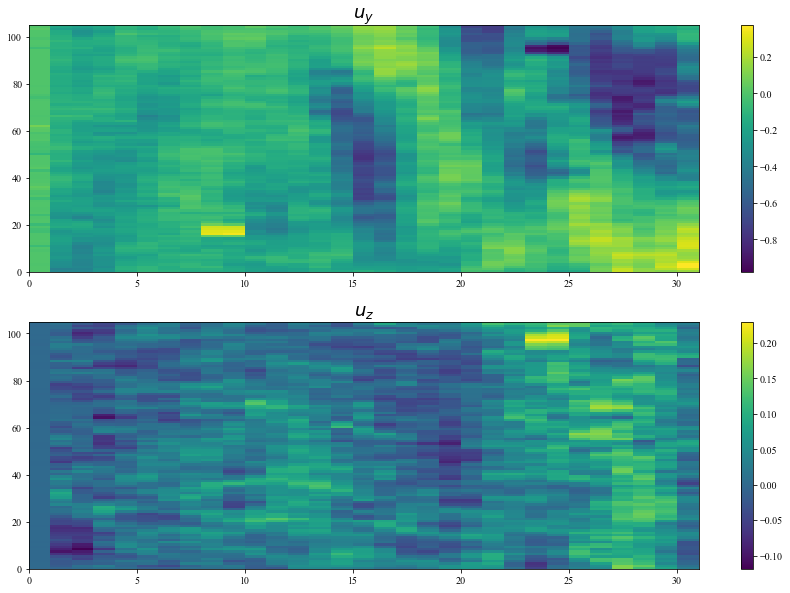

In [35]:
Vlist[0].m['volume'].shape

window_size = [16,64]
overlap = [8,32]
dt = 1

s2n_thresh = 1.1


i=10


a=2

print('test ...')
k0 = 200
frame_a = np.nanmean(Vlist[0].m['volume'][2:,k0-a:k0+a+1,:],axis=1).astype(np.int32)
frame_b = np.nanmean(Vlist[4].m['volume'][2:,k0-a:k0+a+1,:],axis=1).astype(np.int32)

#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )

nz,ny = u.shape
print(nz)

klist = range(k0-50,k0+55,1)
nx = len(klist)


tlist = range(0,6,2)
nt = len(tlist)
Uy = np.zeros((nt,nx,ny))
Uz = np.zeros((nt,nx,ny))

print('process serie ...')
a=2

for t,instant in enumerate(tlist):
    print('frame : '+str(instant))
    for i,k in enumerate(klist):
        frame_a = np.nanmean(Vlist[instant].m['volume'][2:19,k-a:k+a+1,:],axis=1).astype(np.int32)
        frame_b = np.nanmean(Vlist[instant+2].m['volume'][2:19,k-a:k+a+1,:],axis=1).astype(np.int32)
#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
        u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )
    
        Uy[t,i,:] = u[0,:]
        Uz[t,i,:] = v[0,:]
    
    #u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = s2n_thresh )

#fig,axs=plt.subplots(1,2,figsize=(15,10))
#plt.subplot(1,2,1)
#filename = savefolder + 'b'
#graphes.save_fig(2,filename,frmt='png',dpi=300,overwrite=False)

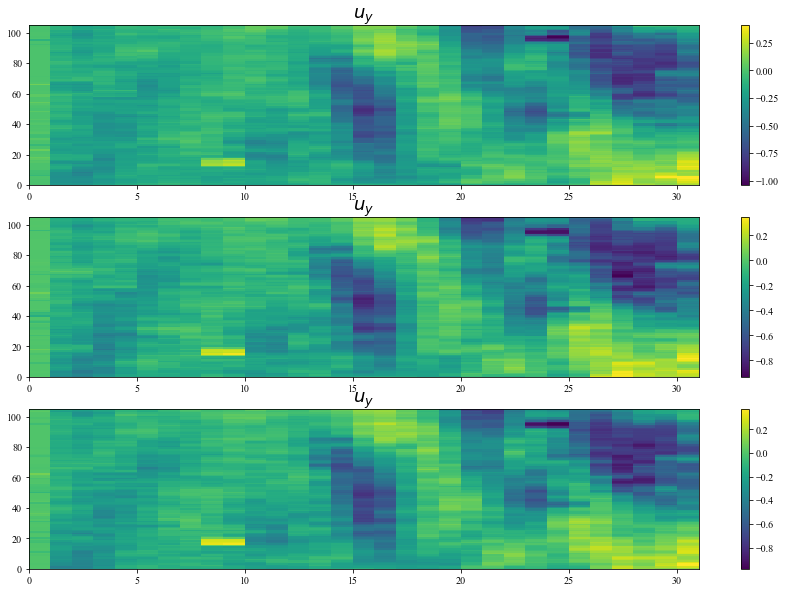

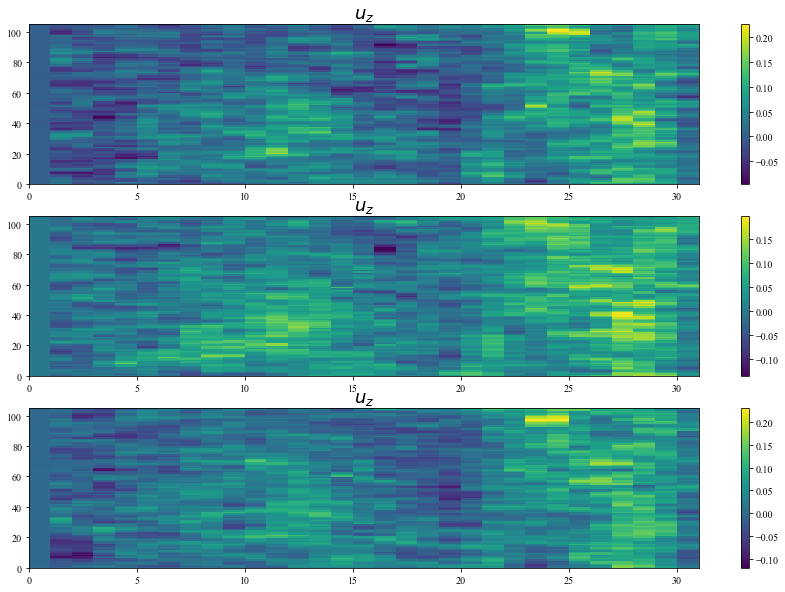

In [36]:
fig,axs=plt.subplots(nt,1,figsize=(15,10))
for t,instant in enumerate(tlist):
    plt.subplot(nt,1,t+1)
    plt.pcolormesh(Uy[t,...])#,vmin=-5,vmax=5)
    plt.colorbar()
    graphes.legende('','','$u_y$')

fig,axs=plt.subplots(nt,1,figsize=(15,10))
for t,instant in enumerate(tlist):
    plt.subplot(nt,1,t+1)
    plt.pcolormesh(Uz[t,...])#,vmin=-5,vmax=5)
    plt.colorbar()
    graphes.legende('','','$u_z$')

{1: {'fignum': '_vs_', 'data': {}}}

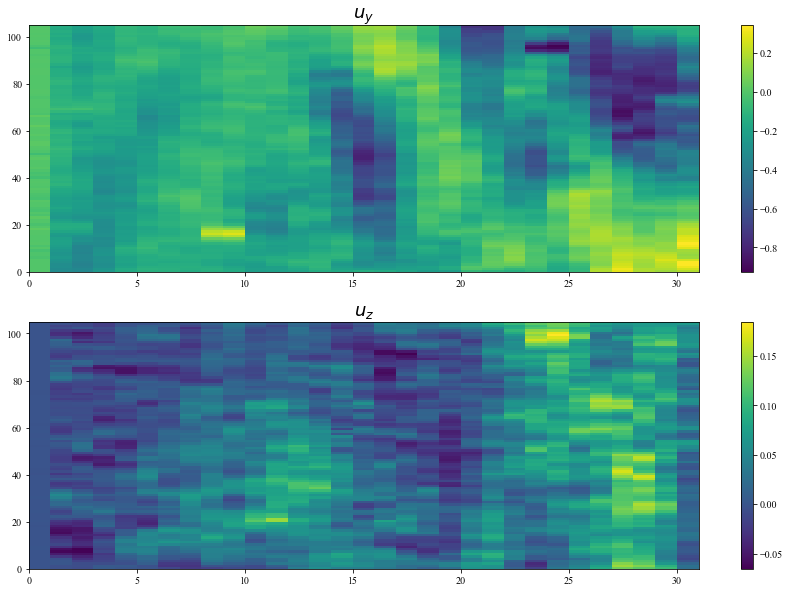

In [37]:
fig,axs=plt.subplots(2,1,figsize=(15,10))

plt.subplot(2,1,1)
plt.pcolormesh(np.nanmean(Uy,axis=0))#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_y$')

plt.subplot(2,1,2)
plt.pcolormesh(np.nanmean(Uz,axis=0))#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_z$')


In [40]:
Vlist[0].m['volume'].shape

window_size = [16,64]
overlap = [8,32]
dt = 1

s2n_thresh = 1.1


i=10

a=2

print('test ...')
k0 = 600
frame_a = np.nanmean(Vlist[0].m['volume'][2:19,:,k0-a:k0+a+1],axis=2).astype(np.int32)
frame_b = np.nanmean(Vlist[4].m['volume'][2:19,:,k0-a:k0+a+1],axis=2).astype(np.int32)

#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )

nz,ny = u.shape
print(nz)

klist = range(k0-10,k0+11,1)
nx = len(klist)


tlist = range(0,6,2)
nt = len(tlist)
Uy = np.zeros((nt,nx,ny))
Uz = np.zeros((nt,nx,ny))

print('process serie ...')
a=2

for t,instant in enumerate(tlist):
    print('frame : '+str(instant))
    for i,k in enumerate(klist):
        frame_a = np.nanmean(Vlist[instant].m['volume'][2:19,:,k-a:k+a+1],axis=2).astype(np.int32)
        frame_b = np.nanmean(Vlist[instant+2].m['volume'][2:19,:,k-a:k+a+1],axis=2).astype(np.int32)
#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
        u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )
    
        Uy[t,i,:] = u[0,:]
        Uz[t,i,:] = v[0,:]
    
    #u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = s2n_thresh )

#fig,axs=plt.subplots(1,2,figsize=(15,10))
#plt.subplot(1,2,1)
#filename = savefolder + 'b'
#graphes.save_fig(2,filename,frmt='png',dpi=300,overwrite=False)

test ...
1
process serie ...
frame : 0
frame : 2
frame : 4


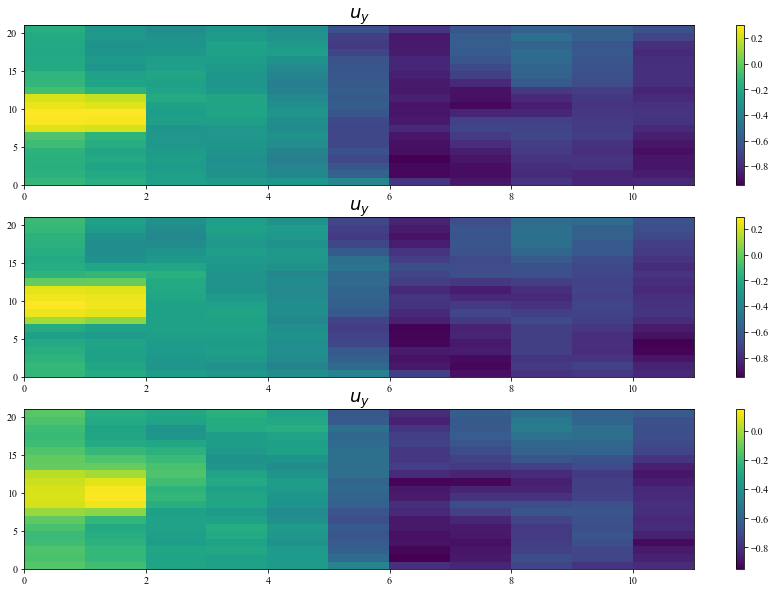

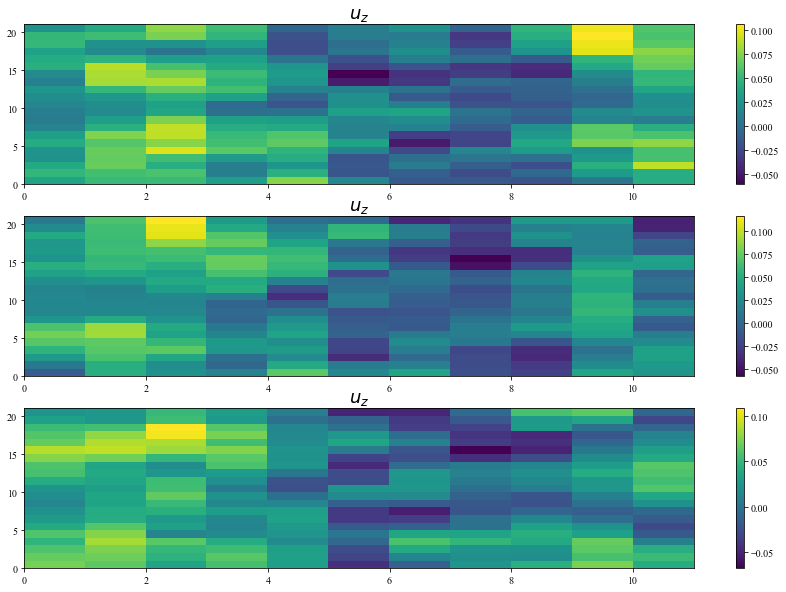

In [41]:
fig,axs=plt.subplots(nt,1,figsize=(15,10))
for t,instant in enumerate(tlist):
    plt.subplot(nt,1,t+1)
    plt.pcolormesh(Uy[t,...])#,vmin=-5,vmax=5)
    plt.colorbar()
    graphes.legende('','','$u_x$')

fig,axs=plt.subplots(nt,1,figsize=(15,10))
for t,instant in enumerate(tlist):
    plt.subplot(nt,1,t+1)
    plt.pcolormesh(Uz[t,...])#,vmin=-5,vmax=5)
    plt.colorbar()
    graphes.legende('','','$u_z$')

{1: {'fignum': '_vs_', 'data': {}}}

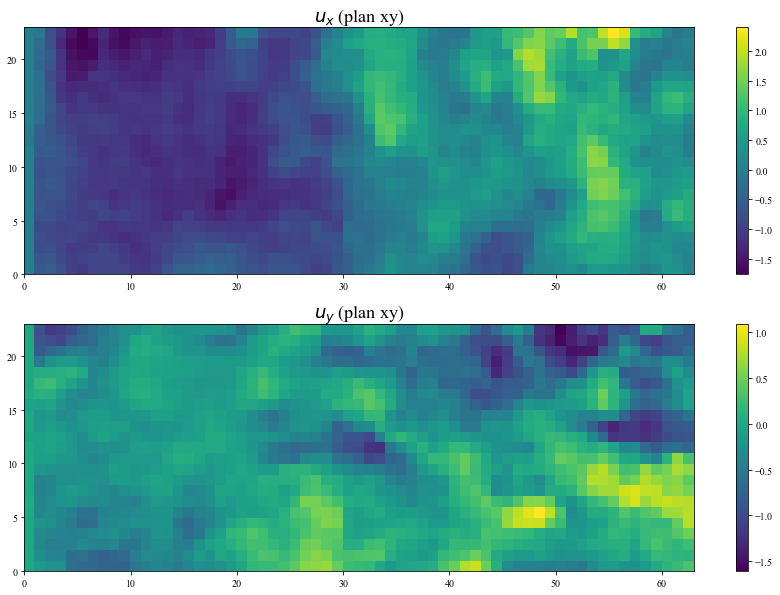

In [58]:
l=10
window_size = [32,32]
overlap = [16,16]
dt = 1
s2n_thresh = 1.1

frame_a = Vlist[0].m['volume'][l,...].astype(np.int32)
frame_b = Vlist[2].m['volume'][l,...].astype(np.int32)

#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )

Uy_xy = u
Ux_xy = v

fig,axs=plt.subplots(2,1,figsize=(15,10))
plt.subplot(2,1,1)
plt.pcolormesh(Ux_xy)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_x$ (plan xy)')

plt.subplot(2,1,2)
plt.pcolormesh(Uy_xy)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_y$ (plan xy)')

In [64]:
Vlist[0].m['volume'].shape

window_size = [16,32]
overlap = [8,16]
dt = 1
s2n_thresh = 1.1

Nz,Nx,Ny = Vlist[0].m['volume'][2:19,...].shape

i=10
a=4

print('test ...')
k0 = 200
frame_a = np.nanmean(Vlist[0].m['volume'][2:19,k0-a:k0+a+1,:],axis=1).astype(np.int32)
frame_b = np.nanmean(Vlist[2].m['volume'][2:19,k0-a:k0+a+1,:],axis=1).astype(np.int32)

#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )

nz,ny = u.shape
print(nz)

klist = range(a,Nx-a,5)
nx = len(klist)

Uy_yz = np.zeros((nx,ny))
Uz_yz = np.zeros((nx,ny))

print('process serie ...')
a=2

instant=0
for i,k in enumerate(klist):
    frame_a = np.nanmean(Vlist[instant].m['volume'][2:19,k-a:k+a+1,:],axis=1).astype(np.int32)
    frame_b = np.nanmean(Vlist[instant+2].m['volume'][2:19,k-a:k+a+1,:],axis=1).astype(np.int32)
#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
    u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )
    
    Uy_yz[i,:] = u[0,:]
    Uz_yz[i,:] = v[0,:]
    
    #u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = s2n_thresh )

#fig,axs=plt.subplots(1,2,figsize=(15,10))
#plt.subplot(1,2,1)
#filename = savefolder + 'b'
#graphes.save_fig(2,filename,frmt='png',dpi=300,overwrite=False)

test ...
1
process serie ...


{2: {'fignum': '_vs_', 'data': {}}}

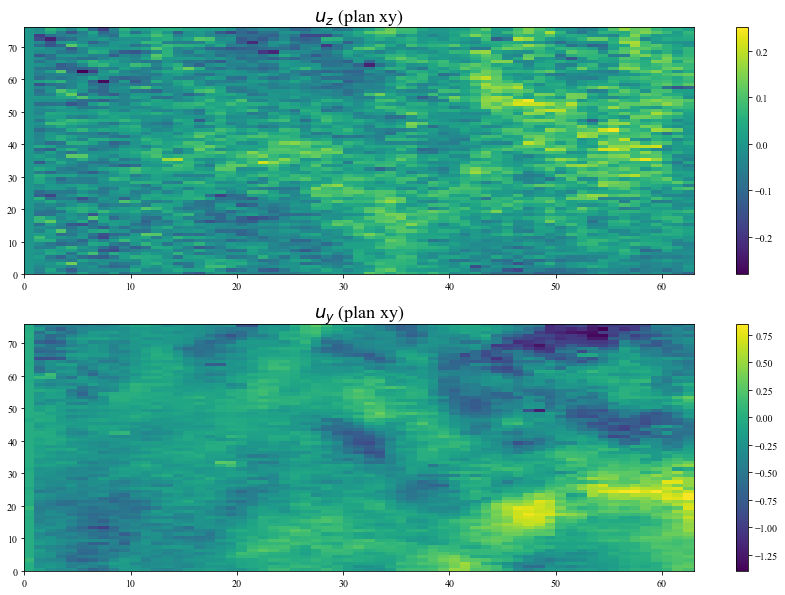

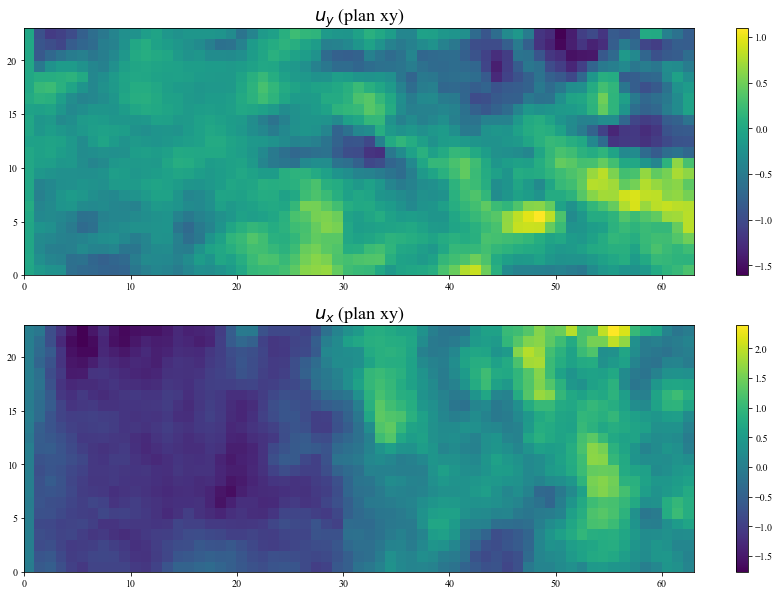

In [48]:
fig,axs=plt.subplots(2,1,figsize=(15,10))
plt.subplot(2,1,1)
plt.pcolormesh(Uz_yz)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_z$ (plan yz)')

plt.subplot(2,1,2)
plt.pcolormesh(Uy_yz)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_y$ (plan xy)')

fig,axs=plt.subplots(2,1,figsize=(15,10))
plt.subplot(2,1,1)
plt.pcolormesh(Uy_xy)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_y$ (plan yz)')

plt.subplot(2,1,2)
plt.pcolormesh(Ux_xy)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_x$ (plan xy)')

In [8]:
Vlist[0].m['volume'].shape

window_size = [16,32]
overlap = [8,16]
dt = 1
s2n_thresh = 1.1

Nz,Nx,Ny = Vlist[0].m['volume'][2:19,...].shape

i=10
a=4

print('test ...')
k0 = 512
frame_a = np.nanmean(Vlist[0].m['volume'][2:18,:,k0-a:k0+a+1],axis=2).astype(np.int32)
frame_b = np.nanmean(Vlist[2].m['volume'][2:18,:,k0-a:k0+a+1],axis=2).astype(np.int32)

#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )

nz,nx = u.shape
print(nz)

klist = range(a,Ny-a,5)
ny = len(klist)

Ux_xz = np.zeros((nx,ny))
Uz_xz = np.zeros((nx,ny))

print('process serie ...')
a=2

instant=0
for i,k in enumerate(klist):
    frame_a = np.nanmean(Vlist[instant].m['volume'][2:18,:,k-a:k+a+1],axis=2).astype(np.int32)
    frame_b = np.nanmean(Vlist[instant+2].m['volume'][2:18,:,k-a:k+a+1],axis=2).astype(np.int32)
#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
    u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )
    
    Ux_xz[:,i] = -u[0,:] #Why this minus sign ? unclear for now. Might be due to the filling of the matrix.
    Uz_xz[:,i] = v[0,:]
    
    #u, v, mask = openpiv.validation.sig2noise_val( u, v, sig2noise, threshold = s2n_thresh )

#fig,axs=plt.subplots(1,2,figsize=(15,10))
#plt.subplot(1,2,1)
#filename = savefolder + 'b'
#graphes.save_fig(2,filename,frmt='png',dpi=300,overwrite=False)

test ...
1
process serie ...


In [59]:
#mesure du plan xy

l=10
window_size = [32,32]
overlap = [16,16]
dt = 1
s2n_thresh = 1.1


l0 = 10
frame_a = Vlist[0].m['volume'][l0,...].astype(np.int32)
frame_b = Vlist[2].m['volume'][l0,...].astype(np.int32)
u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )
nx,ny = u.shape

zlist = range(2,19)
nz = len(zlist)

Ux_3d = np.zeros((nz,nx,ny))
Uy_3d = np.zeros((nz,nx,ny))

for l,z in enumerate(zlist):
    print(l)
    frame_a = Vlist[0].m['volume'][z,...].astype(np.int32)
    frame_b = Vlist[2].m['volume'][z,...].astype(np.int32)

#frame_a = Vlist[0].m['volume'][i,...].astype(np.int32)
#frame_b = Vlist[2].m['volume'][i,...].astype(np.int32)
#            u,v = process_frame(self,frame_a,frame_b,s2n_thresh=1.3):
    u,v,sig2noise = process.extended_search_area_piv(frame_a, frame_b, window_size=window_size, overlap=overlap, dt=1, search_area_size=window_size,sig2noise_method='peak2peak' )

    Uy_3d[l,...] = u
    Ux_3d[l,...] = v

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


In [60]:
savefolder = savefolder + 'test_piv3d3c/'
os.makedirs(savefolder)

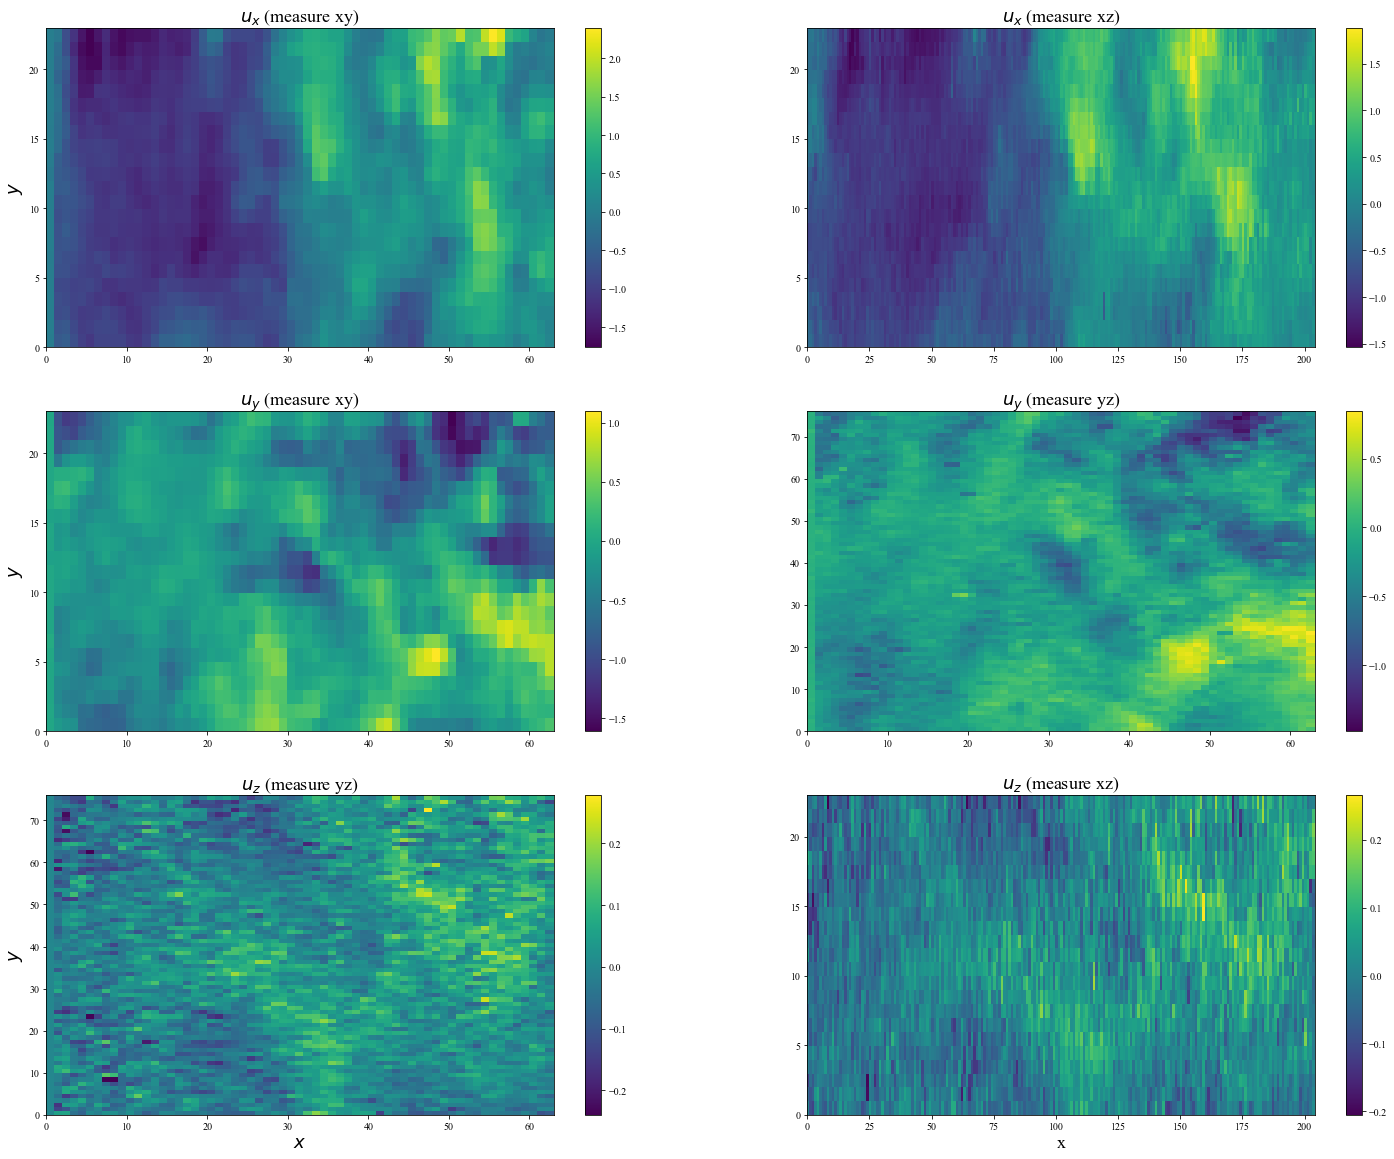

In [66]:
fig,axs=plt.subplots(2,3,figsize=(25,20))

plt.subplot(3,2,1)
plt.pcolormesh(Ux_xy)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','$y$','$u_x$ (measure xy)')

plt.subplot(3,2,2)
plt.pcolormesh(Ux_xz)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_x$ (measure xz)')

plt.subplot(3,2,3)
plt.pcolormesh(Uy_xy)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','$y$','$u_y$ (measure xy)')

plt.subplot(3,2,4)
plt.pcolormesh(Uy_yz)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('','','$u_y$ (measure yz)')

plt.subplot(3,2,5)
plt.pcolormesh(Uz_yz)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('$x$','$y$','$u_z$ (measure yz)')

plt.subplot(3,2,6)
plt.pcolormesh(Uz_xz)#,vmin=-5,vmax=5)
plt.colorbar()
graphes.legende('x','','$u_z$ (measure xz)')

filename = savefolder + 'Measure_UxUyUz'
graphes.save_fig(1,filename,frmt='png',dpi=300,overwrite=False)

In [67]:
Ux_3d.shape

(17, 23, 63)

In [ ]:
import mayavi.mlab as mlab


In [99]:
savefolder = savefolder + 'test_volume/'
os.makedirs(savefolder)

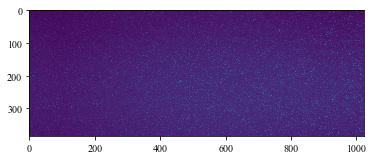

In [112]:
for i in range(5):
#    plt.figure(i+1)
    frame = Vlist[i].m['volume'][10,...].astype(np.int32)
    plt.imshow(frame)
    fig = graphes.legende('','','',cplot=True)
    filename = savefolder + str(i)
    graphes.save_fig(1,filename,frmt='png',dpi=300,overwrite=False)

In [ ]:
Vlist[0].m['volume'][].shape

In [39]:
Vlist[0].m['volume'][].shape

(384, 1024)

In [ ]:
[slice() for i in np.arange(10)]

In [33]:
float(Vlist[0].m['tV'])

3.180924833752215

In [50]:
V1.data.param.fx

'0.277'

In [46]:
V1.m['volume'][t].shape

(384, 1024)

In [74]:
ext = '.hdf5'
l=glob.glob(folder+'*'+ext)
for i,name in enumerate(l):
    print(str(i)+' : '+os.path.basename(name))

s = input()
try:
    i = int(s)
except:
    print("cannot be converted to an integer")

mesurefile = l[i]

0 : Mesure_0_20181106_2_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
1 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2.hdf5
2 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2_partial.hdf5
3 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm.hdf5
4 : Mesure_0_20181106_1_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.hdf5
5 : 20181106_1_PIV3d_nikon50mm_scale.hdf5
6 : 20181106_2_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5
7 : 20181106_3_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5_z450mm.hdf5
8 : 20181106_4_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm.hdf5
9 : 20181106_5_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f800Hz_A1600mV_line5_z400mm_EXPT2.hdf5
10 : Mesure_2_20181106_1_PIV3d_n

In [26]:
mesurefile

'/Volumes/Diderot/DATA_MSC_Jamin/Turbulence3d/20181106/Mesure_0_20181106_2_PIV3d_nikon50mm_64pumps_random16_fps40k_Pump30Hz_f1kHz_A1600mV_line5.hdf5'

In [75]:
f = h5pylea.ouverture_fichier(mesurefile)
M = h5pylea.h5py_in_Mesure(f)
f.close()#ouvrir un data à partir d'un hdf5 existant

<class 'module'>
{'fx': '0.277', 'Comment': 'Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera', 'l_in': '44', 'l_out': '57', 'l_c': '60.5', 'Dlaser': '152.6', 'Dcamera': '73.6', 'Angle': '0', 'x0': '0', 'y0': '70', 'Dcuves': '(40,40,63)', 'Laserwidth': 'Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast'}


In [94]:
M.data.param.__dict__

{'fx': '0.277',
 'Comment': 'Mesure PIV 3D sur cuve T. Jamin a MSC, balayage laser a 90degres de la camera',
 'l_in': '44',
 'l_out': '57',
 'l_c': '60.5',
 'Dlaser': '152.6',
 'Dcamera': '73.6',
 'Angle': '0',
 'x0': '0',
 'y0': '70',
 'Dcuves': '(40,40,63)',
 'Laserwidth': 'Has been increased to about 2mm to avoid loss of particles between two adjacent images, and improve contrast',
 'spec': []}

In [76]:
#M.data.param.fps = int(M.data.param.fps[:-1])*1000
#M.data.param.f = int(M.data.param.f[:-3])*1000
#M.data.param.fx = float(M.data.param.fx)
# update some parameters

print(M.data.param.fps)
print(M.data.param.f)
print(M.data.param.fx)

M.PIV3D.data = M.data

AttributeError: 'Param' object has no attribute 'fps'

In [42]:
M.PIV3D.m['U'] = M.PIV3D.m['np']
M.PIV3D.m.pop('np')

array([[[[            nan,             nan],
         [-9.51807022e-01, -4.06265259e-03],
         [-7.79851913e-01, -7.37953186e-02],
         ...,
         [ 6.48654938e-01,  1.02441788e+00],
         [ 6.04118347e-01,  1.02114296e+00],
         [            nan,             nan]],

        [[            nan,             nan],
         [-7.92375565e-01,  1.20380402e-01],
         [-6.20676041e-01,  1.66206360e-01],
         ...,
         [ 5.01815796e-01,  1.01694107e+00],
         [ 5.63861847e-01,  1.01125145e+00],
         [            nan,             nan]],

        [[            nan,             nan],
         [-2.96548843e-01,  2.29539871e-01],
         [-2.55971909e-01,  1.96941376e-01],
         ...,
         [ 3.31470490e-01,  8.77960205e-01],
         [ 2.47882843e-01,  8.41100693e-01],
         [            nan,             nan]],

        ...,

        [[            nan,             nan],
         [ 4.51164246e-02,  2.92079926e-01],
         [-1.49684906e-01, -7.92808533

In [43]:
print(M.PIV3D.m['U'].shape)
ff = M.PIV3D.m['U']

(127397, 23, 63, 2)


In [47]:
M.data.param.startV = int(M.data.param.startV)
M.data.param.endV = int(M.data.param.endV)

In [50]:
 #convert 2d to 3d data
(Nt,Nx,Ny,Nc) = ff.shape
frame_diff = M.data.param.fps // M.data.param.f
print(frame_diff)
Nt = Nt//frame_diff
Nz = frame_diff

ff = np.reshape(ff[:Nt*Nz,...],(Nt,Nz,Nx,Ny,Nc))
ff[...,1] = -ff[...,1] #reverse sign of horizontal component
start = M.data.param.startV
end = M.data.param.endV
#ff=ff[:,9:25,...]
#(start,end) = v.m['instantV'][0]
ff=ff[:,start+2:end-2,...]
print(ff.shape)

40
(3184, 16, 23, 63, 2)


In [ ]:
piv = M.PIV3D

In [59]:
piv.data.param.l_c = float(piv.data.param.l_c)

In [60]:
piv.data.param.fx

0.277

In [61]:
dz = float(piv.data.param.l_c)/frame_diff*2
print(dz)

piv.m['overlap'] = 16
dx = piv.data.param.fx*piv.m['overlap']
print(dx)

#generate axis
(Nz,Nx,Ny,Nc) = mean_flow.shape
#mean_flow = np.transpose(mean_flow,(1,2,0,3))

x = np.arange(-(Nx-1)/2,(Nx-1)/2+1)*dx
y = np.arange(-(Ny-1)/2,(Ny-1)/2+1)*dx
z = np.arange(-Nz/2,Nz/2)*dz-2

#invariance by rotation in the plane (x,z)

[X,Z,Y] = np.meshgrid(x,z,y)
print(X.shape)

2.2
4.432


In [66]:
#generate space axis
piv.m['x'] = x
piv.m['y'] = y
piv.m['z'] = z

In [67]:
piv.data.param.fps

40000

In [70]:
piv.m['U'].shape

(3184, 16, 21, 61, 2)

In [72]:
#generate time axis
ft = frame_diff/piv.data.param.fps
print(ft)
piv.m['ft'] =  ft
piv.m['t'] = np.arange(0,Nt*ft,ft)
piv.m['t'].shape

0.001


(3184,)

In [51]:
def nancount(data):
    print(data.shape)
    Nnan = np.sum(np.ndarray.flatten(np.isnan(data)))
    N = np.prod(data.shape)
    print('Ratio nan :' +str(Nnan/N))
    print('nan number :'+str(Nnan))

In [52]:
nancount(ff)
ff = ff[...,1:-1,1:-1,:]
nancount(ff)

(3184, 16, 23, 63, 2)
Ratio nan :0.07385668313097579
nan number :10903884
(3184, 16, 21, 61, 2)
Ratio nan :2.9896138577352023e-05
nan number :3902


In [53]:
Nt = ff.shape[0]
for i in range(Nt):
    for j in range(2):
        data = np.squeeze(ff[i,...,j])
        indices = np.where(np.isnan(data))
        (t0,t1,t2) = indices
        for tup in zip(t0,t1,t2):
            data = cdata.replace_nan(data,tup)
        ff[i,...,j]=data
nancount(ff)

(3184, 16, 21, 61, 2)
Ratio nan :0.0
nan number :0


In [63]:
piv.m['U'] = ff
piv.m.pop('fluc')

array([[[[[-1.00859649e+00, -8.53744086e-02],
          [-8.96077916e-01,  1.71344326e-01],
          [-1.04690249e+00,  2.37501622e-01],
          ...,
          [ 5.22969578e-02,  4.35724658e-01],
          [-7.53773016e-01,  6.77937407e-01],
          [-5.90213148e-01,  5.85274581e-01]],

         [[-1.14741085e+00, -1.05119508e-01],
          [-9.29796275e-01,  1.44123222e-01],
          [-9.60307871e-01,  2.00853421e-01],
          ...,
          [-5.73758562e-01,  1.72422738e-01],
          [-7.53637733e-01,  3.93208537e-01],
          [-6.00604513e-01,  5.05399124e-01]],

         [[-9.27434179e-01,  4.03910989e-02],
          [-8.30012994e-01,  1.61704357e-01],
          [-8.36032220e-01,  1.94219692e-01],
          ...,
          [-8.86670879e-01, -5.00479460e-01],
          [-7.49419526e-01,  1.67857882e-01],
          [-7.68925240e-01,  3.93146902e-01]],

         ...,

         [[-8.37320768e-01, -8.88776776e-01],
          [-4.46094567e-01, -6.40559775e-01],
          [-2.

In [56]:
#compute mean_flow
mean_flow = np.nanmean(ff,axis=0)
mean_flow_speed = np.linalg.norm(mean_flow,axis=2)
mean_speed = np.nanmean( np.sqrt(ff[...,0]**2 + ff[...,1]**2 ), axis=0)
fluc = ff - mean_flow    
u_rms = np.sqrt(np.nanmean(fluc[...,0]**2+fluc[...,1]**2 ,axis=0) )

piv.m['mean_flow'] = mean_flow
piv.m['fluc'] = fluc
piv.m['u_rms'] = u_rms

In [73]:
#sauvegarde la mesure
f = h5pylea.file_name_in_dir(M, savefolder,overwrite=True)
h5pylea.obj_in_h5py(M,f)
f.close()

[b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  30  27 ...  32  51  45]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  31  29 ...  33  34  36]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  28  27 ...  31  32  33]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  30  30 ...  31  32  34]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  34  33 ...  31  31  34]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b\'b\\\'b\\\\\\\'b\\\\\\\\\\\\\\\'b"b\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'[255  32  31 ...  31  32  33]\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\'"\\\\\\\\\\\\\\\'\\\\\\\'\\\'\'', b'b

[[[[ 2.00103833e-01  4.80485493e-01]
   [ 2.18562886e-01  4.91512730e-01]
   [ 2.33259984e-01  4.86867427e-01]
   ...
   [ 3.50290933e-01 -1.12248842e+00]
   [ 3.58036322e-01 -1.10310258e+00]
   [ 3.74694197e-01 -1.09807480e+00]]

  [[ 2.17431530e-01  4.84037202e-01]
   [ 2.17937526e-01  4.86564492e-01]
   [ 2.21967493e-01  4.83899997e-01]
   ...
   [ 3.84393175e-01 -1.12951693e+00]
   [ 3.97554816e-01 -1.10872940e+00]
   [ 4.08801534e-01 -1.07607783e+00]]

  [[ 2.46348593e-01  4.83942855e-01]
   [ 2.29787546e-01  4.88178913e-01]
   [ 2.13048288e-01  4.83175175e-01]
   ...
   [ 4.18086818e-01 -1.15398335e+00]
   [ 4.27893952e-01 -1.12932181e+00]
   [ 4.25051263e-01 -1.09587517e+00]]

  ...

  [[ 1.87817060e-01  7.88852688e-01]
   [ 2.19162042e-01  7.70175558e-01]
   [ 2.49659489e-01  7.55217825e-01]
   ...
   [ 4.22376627e-01 -1.35093901e+00]
   [ 4.32463965e-01 -1.31320151e+00]
   [ 4.50016864e-01 -1.23211342e+00]]

  [[ 1.79308059e-01  7.72673306e-01]
   [ 1.88726797e-01  7.51222043e

In [ ]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],mean_flow[i*4+j,...,0],vmin=-0.2,vmax=0.2)
#    plt.colorbar()
plt.colorbar()

In [ ]:


#processing.__dict__.pop('data')
print(processing.__dict__.keys())
piv.m.update(processing.__dict__)



1000.0


In [14]:
#to load the parameters from the PIVDataProcessing : to be ignored, 
# the piv parameters should be saved directly with the initial "Mesure" object

cine_name = cinefile
dataname = folder+os.path.basename(cinefile).rsplit(".",1)[0]
save_folder = folder
dx =  float(m.data.param.fx)*10**-3#7.3469357156E-05
fps = int(m.data.param.fps[:-1])*1000
flaser = int(m.data.param.f[0])*1000

dt_orig = 1./fps
crop_lims=None
pre_constructed_masker = None
t0 = 0
a_frames = np.arange(t0,10000+t0,1)
frame_diff = fps//flaser

window_size = 32
overlap = 16

processing = piv.PIVDataProcessing('',cinefile,name_for_save=dataname,dx=dx,dt_orig=dt_orig,frame_diff=frame_diff,crop_lims=crop_lims,maskers=None,window_size=window_size,overlap=overlap,search_area_size=32)
processing.associate_flowfield()

N = processing.data.ff.shape[0]
Nt = N // frame_diff
print(Nt)
print(frame_diff)
ff = processing.data.ff[:Nt*frame_diff,...]

dx : 
0.000277
dt_ab: 
0.001
3184
40


dict_keys(['U'])

In [25]:
#m.add_measurement(piv)
#m.add_measurement(v)

2.2


4.432


(16, 21, 61)


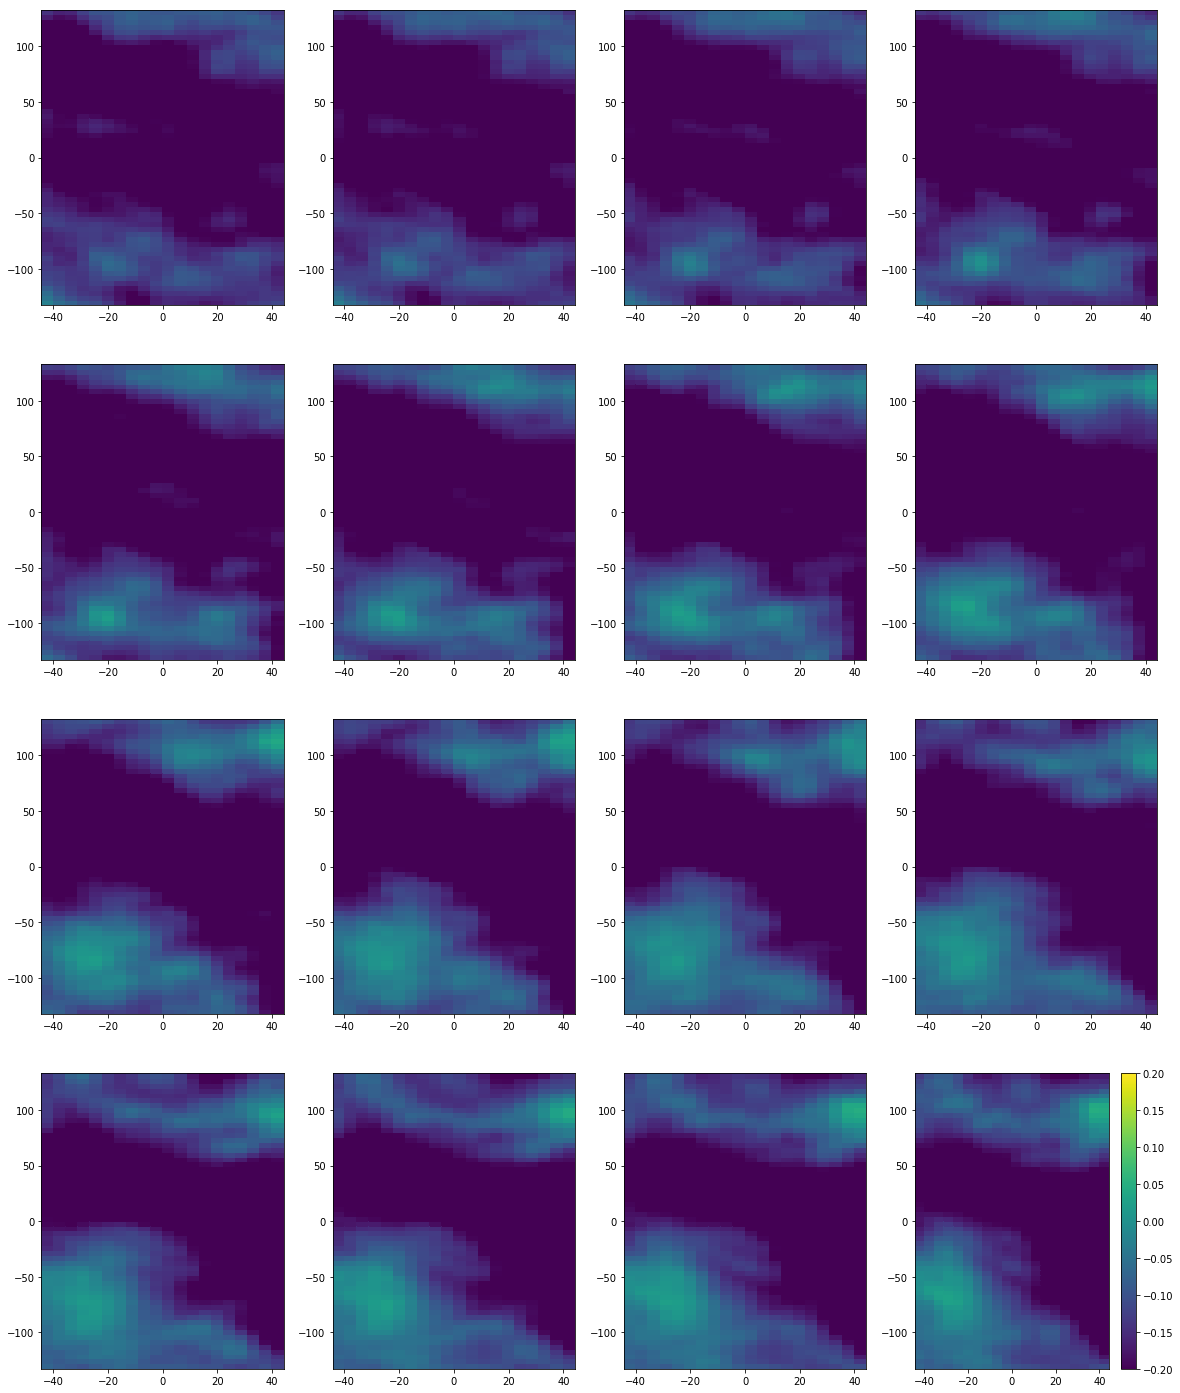

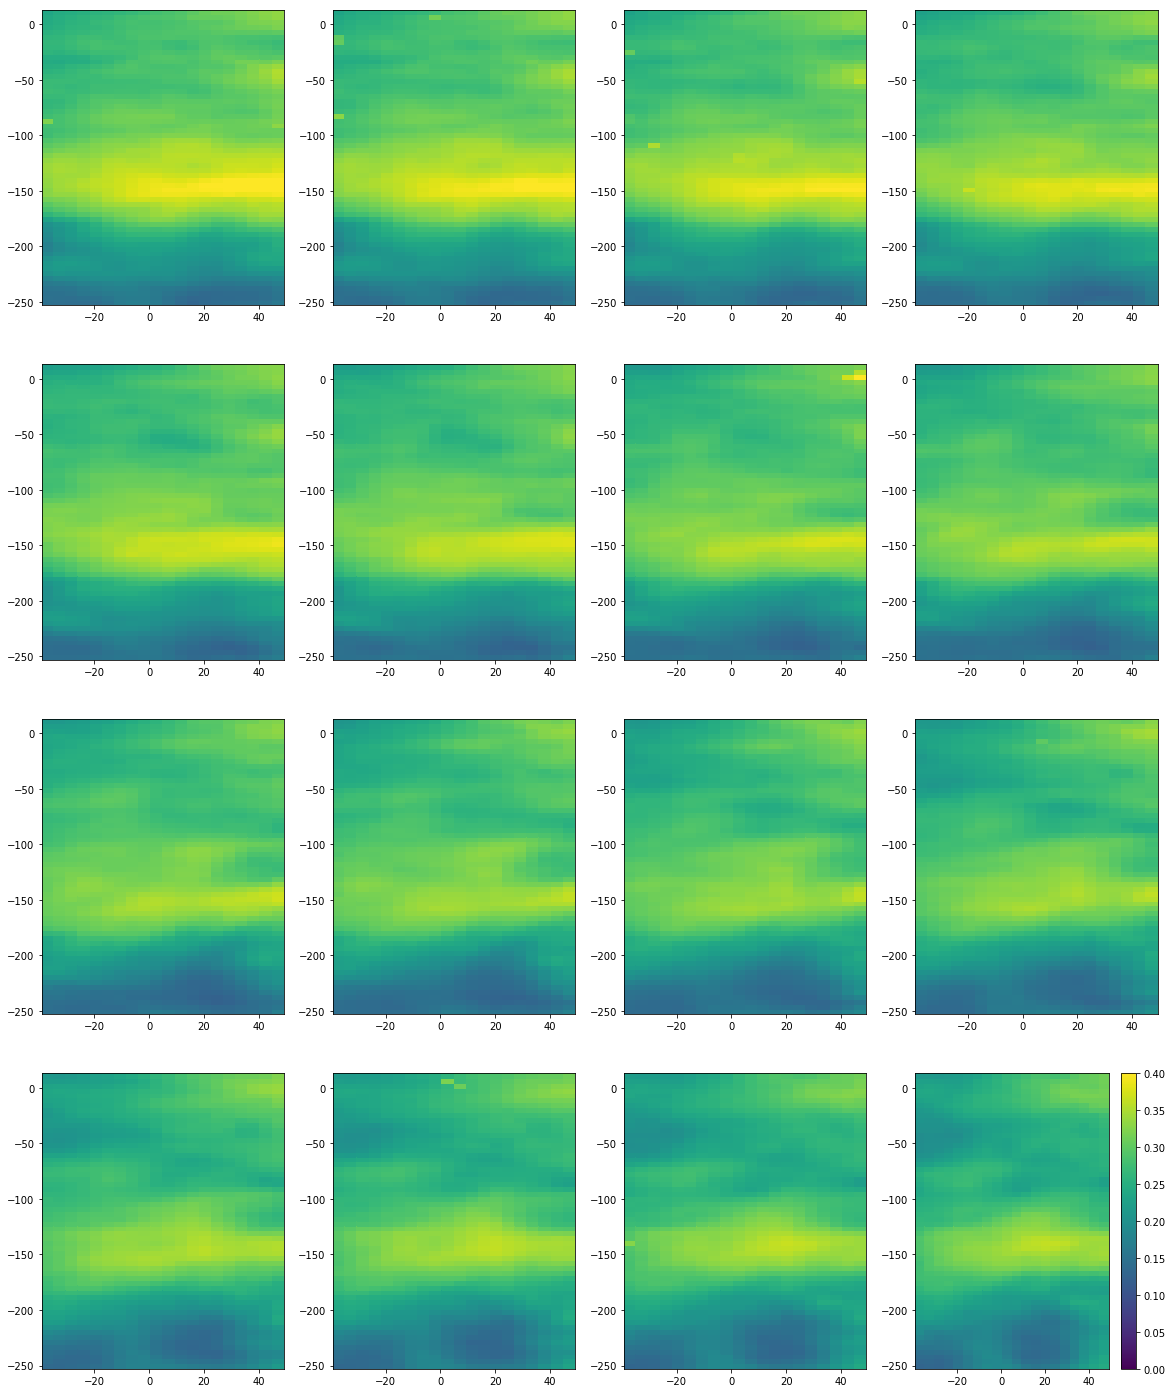

In [38]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],u_rms[i*4+j,...],vmin=0,vmax=0.4)
#    plt.colorbar()
plt.colorbar()

In [67]:
M.PIV3D.m.keys()

dict_keys(['U', 'mean_flow', 'fluc', 'u_rms', 'overlap'])

In [69]:
f = h5pylea.file_name_in_dir(M, savefolder)
h5pylea.obj_in_h5py(M,f)
f.close()

[array([255,  25,  26, ...,  29,  26,  27], dtype=uint8), array([255,  24,  25, ...,  23,  27,  25], dtype=uint8), array([255,  26,  27, ...,  28,  22,  23], dtype=uint8), array([255,  28,  25, ...,  33,  28,  25], dtype=uint8), array([255,  24,  26, ...,  28,  26,  24], dtype=uint8), array([255,  26,  28, ...,  23,  29,  27], dtype=uint8), array([255,  25,  24, ...,  29,  29,  23], dtype=uint8), array([255,  27,  27, ...,  25,  24,  27], dtype=uint8), array([255,  23,  28, ...,  28,  26,  29], dtype=uint8), array([255,  26,  26, ...,  26,  25,  26], dtype=uint8), array([255,  29,  26, ...,  25,  28,  29], dtype=uint8), array([255,  25,  25, ...,  27,  31,  28], dtype=uint8), array([255,  30,  29, ...,  31,  28,  27], dtype=uint8), array([255,  25,  28, ...,  25,  28,  23], dtype=uint8), array([255,  31,  29, ...,  27,  27,  29], dtype=uint8), array([255,  28,  27, ...,  26,  25,  27], dtype=uint8), array([255,  29,  24, ...,  27,  25,  25], dtype=uint8), array([255,  28,  28, ...,  25

[[[[[-1.23468399e-01 -1.06401443e-01]
    [ 3.95240784e-02 -2.03538895e-01]
    [ 1.51737213e-01 -1.25419617e-01]
    ...
    [ 5.16777039e-02  8.68141174e-01]
    [ 2.80380249e-02  6.94602966e-01]
    [ 5.58815002e-02  5.65692902e-01]]

   [[-6.72740936e-02 -1.17200851e-01]
    [ 4.85572815e-02 -3.99684906e-01]
    [ 2.19211578e-01 -3.01610947e-01]
    ...
    [ 1.21402740e-01  7.60993958e-01]
    [ 2.39913940e-01  6.01291656e-01]
    [ 2.75512695e-01  5.19767761e-01]]

   [[-9.17797089e-02 -1.90555573e-01]
    [-2.36911774e-02 -3.10941696e-01]
    [ 7.01255798e-02 -2.53337860e-01]
    ...
    [ 3.23612213e-01  6.49780273e-01]
    [ 3.14365387e-01  5.59383392e-01]
    [ 3.23741913e-01  4.59690094e-01]]

   ...

   [[-4.25825119e-01 -2.08019257e-01]
    [-6.71878815e-01  4.08782959e-02]
    [-6.04597092e-01 -1.06828690e-01]
    ...
    [ 3.77655029e-02  3.37860107e-01]
    [ 2.19974518e-01  3.80722046e-01]
    [ 1.63330078e-01  3.36265564e-01]]

   [[-6.12697601e-01  1.77349091e-01]
  

[[[[-0.02675269 -0.10646099]
   [-0.04478481 -0.10135211]
   [-0.05989137 -0.08555783]
   ...
   [-0.16806282  0.14311389]
   [-0.14322272  0.17489689]
   [-0.14214122  0.21995512]]

  [[-0.05788217 -0.1057163 ]
   [-0.07791303 -0.09698423]
   [-0.0947848  -0.07901198]
   ...
   [-0.19028767  0.1233019 ]
   [-0.1637043   0.16556521]
   [-0.1507357   0.20636191]]

  [[-0.07638228 -0.11603426]
   [-0.10448593 -0.11088682]
   [-0.12078953 -0.09316258]
   ...
   [-0.18171039  0.1064449 ]
   [-0.15907601  0.14388067]
   [-0.14087545  0.17736957]]

  ...

  [[-0.12536987 -0.20275277]
   [-0.13439438 -0.21270169]
   [-0.1347478  -0.2050672 ]
   ...
   [-0.0935217   0.15529515]
   [-0.11442229  0.15942385]
   [-0.12315982  0.13325905]]

  [[-0.11599506 -0.18170995]
   [-0.13159336 -0.19200352]
   [-0.13856496 -0.19481811]
   ...
   [-0.12288642  0.17810258]
   [-0.13688168  0.1816379 ]
   [-0.14026797  0.15888148]]

  [[-0.13213821 -0.15919104]
   [-0.14299307 -0.17226408]
   [-0.15489936 -0.1

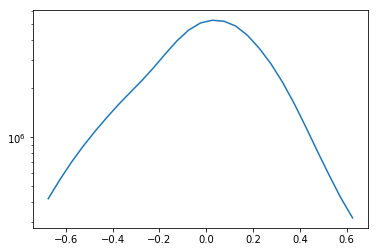

In [70]:
V = fluc[...,0]
[n,x] = np.histogram(np.ndarray.flatten(V),np.arange(-0.7,0.7,0.05))
x = (x[1:]+x[:-1])/2
plt.semilogy(x,n)

In [68]:
fluc.shape

(3150, 16, 21, 61, 2)

In [75]:
M.data.param.fx = float(M.data.param.fx)

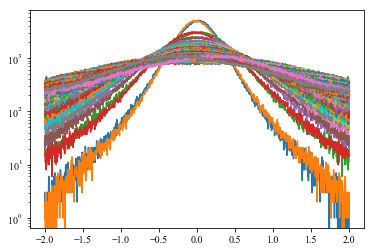

In [119]:
i=1
a = 50
blist = np.arange(i,a)
V2 = []
V3 = []

j = 15
stdfluc = np.std(fluc[:,j,:,a:,0])

for b in blist:
    V = (fluc[:,j,:,a:,0]-fluc[:,j,:,a-b:-b,0])/stdfluc
    V = V# - np.mean(V)
    [n,x] = np.histogram(np.ndarray.flatten(V),1000,[-2,2])
    x = (x[1:]+x[:-1])/2
    plt.semilogy(x,n)
    plt.semilogy(-x,n)
    
    V2.append(np.nanmean(V**2))
    V3.append(np.nanmean(V**3))
    
    
V2 = np.asarray(V2)
V3 = np.asarray(V3)

In [104]:
blist = np.arange(1,a)
blist = blist*piv.m['overlap']*M.data.param.fx
blist

array([ 4.432,  8.864, 13.296, 17.728, 22.16 , 26.592, 31.024, 35.456,
       39.888, 44.32 ])

In [162]:
m.PIV3D.m.keys()

dict_keys(['U', 'mean_flow', 'fluc', 'u_rms'])

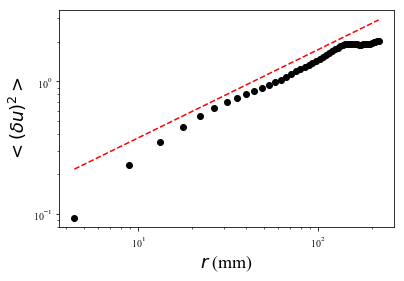

In [120]:
blist = np.arange(1,a)
blist = blist*piv.m['overlap']*M.data.param.fx
plt.loglog(blist,V2,'ko')

b0 = 4.5
alpha = 2./3

plt.loglog(blist,0.22*(blist/b0)**alpha,'r--')
#plt.axis([0,150,1,100])

fig = graphes.legende('$r$ (mm)','$<(\delta u)^2>$','')

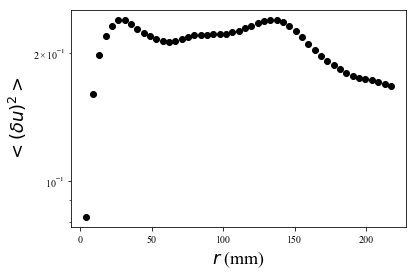

In [121]:
blist = np.arange(1,a)
blist = blist*piv.m['overlap']*M.data.param.fx
plt.semilogy(blist,10**3*(V2/2*stdfluc**2)**(3/2)/blist,'ko')

b0 = 4.5
alpha = 2./3

#plt.loglog(blist,0.25*(blist/b0)**alpha,'r--')
#plt.axis([0,150,1,100])

fig = graphes.legende('$r$ (mm)','$<(\delta u)^2>$','')

In [117]:
epsilon = 0.005

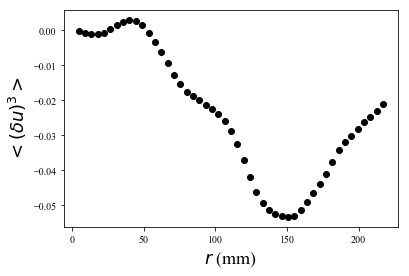

In [122]:
plt.plot(blist,V3*stdfluc**3,'ko')

b0 = 4.5
alpha = 2./3

#plt.plot(blist,-blist*4/5*epsilon*10**-3)
#plt.loglog(blist,0.25*(blist/b0)**alpha,'r--')
#plt.axis([0,40,-0.1,0.2])

fig = graphes.legende('$r$ (mm)','$<(\delta u)^3>$','')

In [172]:
piv.m['overlap']
m.data.param.fx

'0.277'

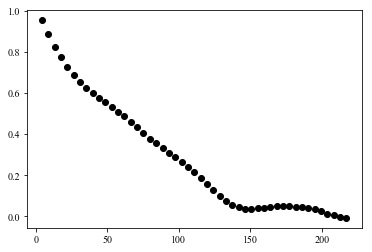

In [123]:
#blist = np.arange(1,50)
#blist = blist*overlap*fx
plt.plot(blist,1-V2/2,'ko')

b0 = 10
alpha = -0.5
#plt.loglog(blist,0.5*(blist/b0)**alpha,'r--')
#plt.axis([1,200,0.1,1])
#plt.axis([0,25,0,0.3])
#    plt.semilogy(-x,n,'r')

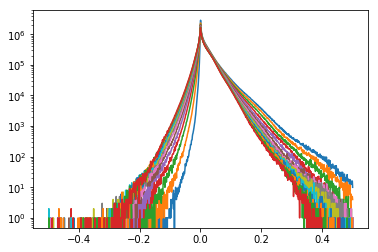

In [95]:
for b in range(1,15):
    V = fluc[...,30:,0]*fluc[...,30-b:-b,0]
    [n,x] = np.histogram(np.ndarray.flatten(V),1000,[-0.5,0.5])
    x = (x[1:]+x[:-1])/2
    plt.semilogy(x,n)
#    plt.semilogy(-x,n,'r')

In [92]:
Eku = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,0]**2,axes=(1,2,3)),axes=(1,2,3)))
Ekw = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,1]**2,axes=(1,2,3)),axes=(1,2,3)))

(16, 21, 61)
[15.649868627581101, 16.293154060324554, 17.221711633152143, 14.135945844126654, 16.427019369259042, 16.519511048551095, 14.81452031051697, 13.874664217727764, 10.595150305334496, 14.904906775056094, 10.756860905928434, 13.571739132234525, 9.634692890656929, 10.873631326992594, 12.753843786235691, 10.623900016446072, 9.387418356843735, 9.594903836338121, 10.042201367164887, 9.40942584575529, 7.693383120571897, 9.637016349913132, 9.986715317605436, 8.070531254678379, 8.449281181381542, 8.264908188141748, 7.463915483680387, 7.004733425947119, 8.234718414576129, 7.796859864659626, 7.187623079925772, 7.588487425860134, 6.632905419990437, 6.445098042676076, 6.675701462419035, 5.964259142757044, 6.250707174716402, 5.737830955973793, 5.641450778270699, 5.938333175438102, 5.560343693958164, 5.256009277584424, 5.4031696238588625, 5.139817300248224, 5.169547655479568, 4.622161683853426, 5.011316026240275, 4.368495256173741, 4.714245575337705, 3.9460458296845067, 4.501517020207098, 3

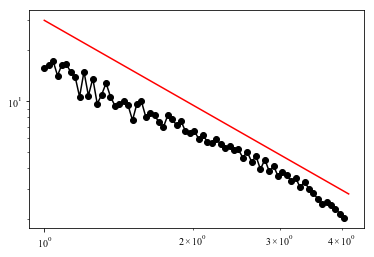

In [94]:
(Nt,Nz,Nx,Ny) = Eku.shape

fx = M.PIV3D.data.param.fx
overlap = piv.m['overlap']
dx = fx*overlap
fx = 0.277
k0x = 1/(2*dx)
k0z = 1/(2*dz)

kx = k0x*np.linspace(-Nx//2,Nx//2,Nx)
ky = k0x*np.linspace(-Ny//2,Ny//2,Ny)
kz = k0z*np.linspace(-Nz//2,Nz//2,Nz)

[Kx,Kz,Ky] = np.meshgrid(kx,kz,ky)
print(Kx.shape)

K = np.sqrt(Kx**2 + Ky**2 + Kz**2)

Klist = np.logspace(0,np.log10(np.max(K)),70)
E1d = []
for i,k0 in enumerate(Klist[:-1]):
    indices = np.logical_and(K>=Klist[i],K<Klist[i+1])
    #print(Ek[250,indices])
    val = np.nanmean(Ekw[:,indices])#*(Klist[i+1]-Klist[i])#*Klist[i]**2
    E1d.append(val)

print(E1d)
plt.loglog(Klist[:-1],E1d,'ko-')
plt.loglog(Klist,30*Klist**(-5./3),'r-')

In [158]:
10**-1.7

0.0199526231496888

dx : 
0.000277
dt_ab: 
0.001


In [27]:
ff.shape

(126000, 23, 63, 2)

(3150, 16, 23, 63, 2)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: Mean of empty slice
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


24


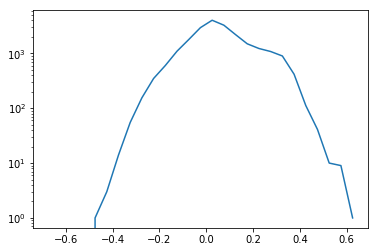

In [131]:
def display_correlation(t,C,DT=250):
    plt.subplot(1,3,1)
    plt.plot(t,C)
    plt.axis([-DT,DT,-0.2,1.05])
    graphes.legende('Time (ms)','$<u(t)u(t+\Delta t) >_{x,y,z}$','')

    plt.subplot(1,3,2)
    plt.plot(t,C)
    plt.axis([-DT/5,DT/5,0.75,1.05])
    graphes.legende('Time (ms)','','')

    plt.subplot(1,3,3)
    plt.plot(t,C)
    plt.axis([-DT/20,DT/20,0.9,1.01])
    graphes.legende('Time (ms)','','')

Total number of frames processed : 220
Volume with less than 5% error : 130


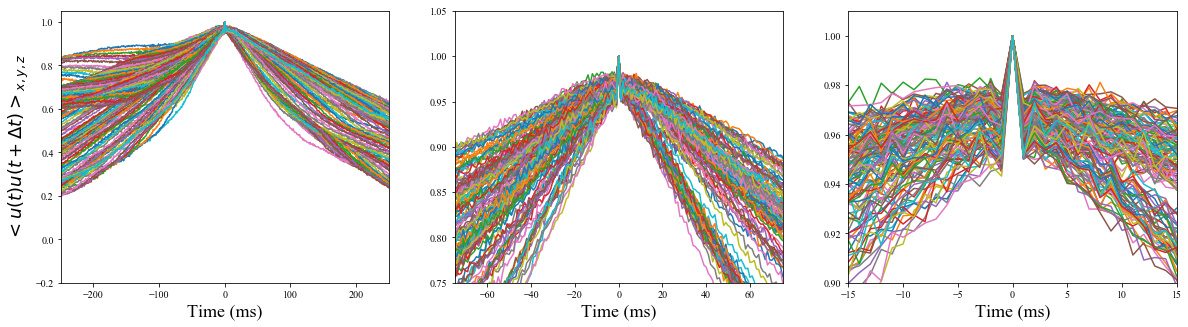

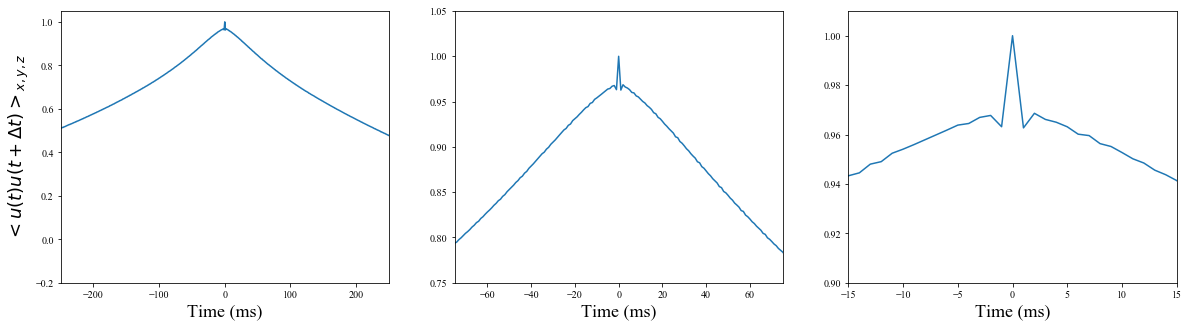

In [129]:
fig,axs=plt.subplots(1,3,figsize=(20,5))

good_frame = []
Ct = []
error = []
DT = 400
tlist = range(DT,3000-DT,10)
print("Total number of frames processed : "+str(len(tlist)))

for t0 in tlist:
    ff2 = np.nanmean(fluc[t0,...,0]**2,axis=(0,1,2))
    C = []
    t = np.arange(t0-DT,t0+DT,1)
    
    C0 = np.nanmean(fluc[t0+1,...,0]*fluc[t0,...,0],axis=(0,1,2))/ff2
    error.append(1-C0)
    if C0>0.95:  
        for tc in t:
#    print(tc)
            C0 = np.nanmean(fluc[tc,...,0]*fluc[t0,...,0],axis=(0,1,2))/ff2
            C.append(C0) 
        display_correlation(t-t0,C)        
        Ct.append(C)
        good_frame.append(t0)
Ct = np.asarray(Ct)

print("Volume with less than 5% error : "+str(Ct.shape[0]))
Ctmean = np.nanmean(Ct,axis=0)
tmean = t-t0

fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

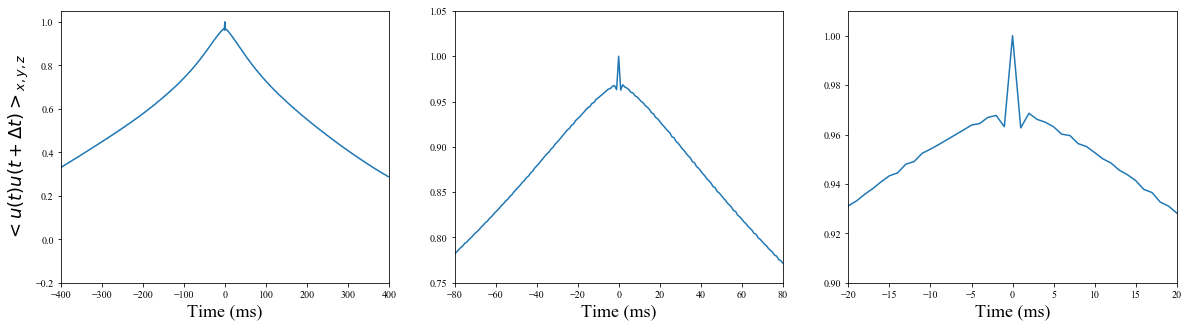

In [132]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean,DT=400)

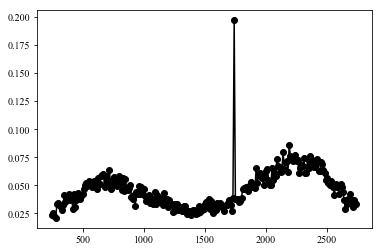

In [127]:
plt.plot(tlist,error,'ko-')
#plt.axis([1500,1600,0,0.8])

In [211]:
print(fluc.shape)

(2999, 40, 23, 63, 2)


Correlation time (ms) : 116 ms


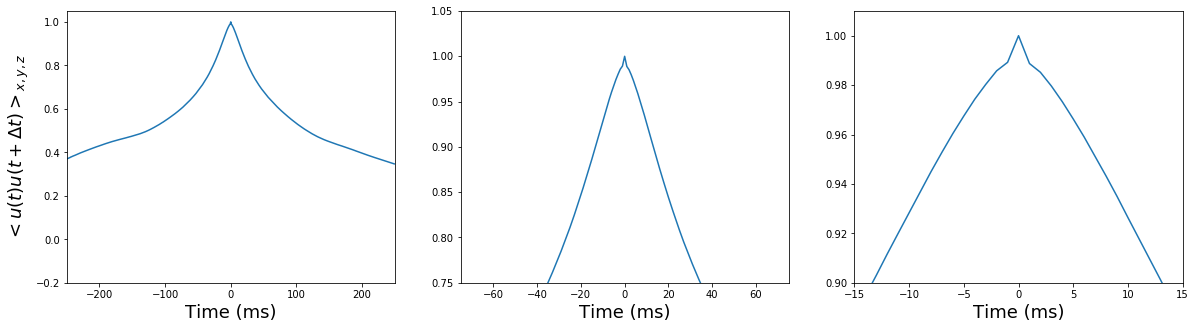

In [65]:
fig,axs=plt.subplots(1,3,figsize=(20,5))
display_correlation(tmean,Ctmean)

i = np.argmin(np.abs(Ctmean-0.5))
print('Correlation time (ms) : '+str(np.abs(tmean[i])) +' ms')

In [341]:
1024/384
41/17

2.411764705882353

In [66]:
#generate axis
(Nz,Nx,Ny,Nc) = mean_flow.shape
#mean_flow = np.transpose(mean_flow,(1,2,0,3))

dz = 42/20
x = np.arange(-(Nx-1)/2,(Nx-1)/2+1)*processing.dx*1E3*overlap+5
y = np.arange(-(Ny-1)/2,(Ny-1)/2+1)*processing.dx*1E3*overlap-120
z = np.arange(-Nz/2,Nz/2)*dz-2

#invariance by rotation in the plane (x,z)

[X,Z,Y] = np.meshgrid(x,z,y)
print(X.shape)

(16, 21, 61)


In [52]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

#j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[:,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[:,k0,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[:,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[:,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)

(16, 22, 62)
(3150, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: Mean of empty slice
  
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: Mean of empty slice
  if __name__ == '__main__':


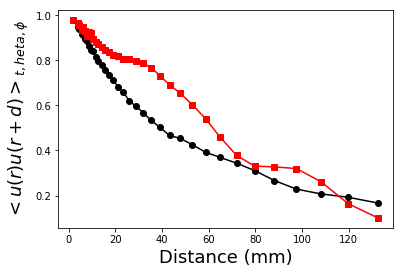

In [40]:
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

(16, 22, 62)
(1062, 16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:34: RuntimeWarning: Mean of empty slice


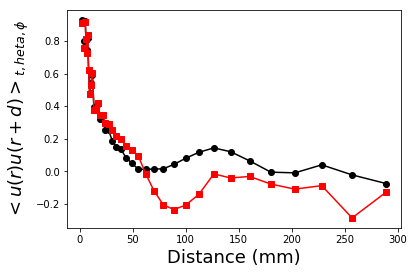

In [260]:
Xv = X[2:18,:-1,:-1]
Yv = Y[2:18,:-1,:-1]
Zv = Z[2:18,:-1,:-1]

flucv = fluc[:,2:18,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 4
print(Xv.shape)

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

R = np.sqrt((Xv-x0)**2+(Yv-y0)**2+(Zv-z0)**2)

ff2u = np.nanmean(flucv[good_frame,k0,i0,j0,0]**2)
ff2v = np.nanmean(flucv[good_frame,k0,i0,j0,1]**2)

Cmapu = flucv[good_frame,...,0]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,0],(Nz,Nx,Ny,1)),(3,0,1,2))
Cmapv = flucv[good_frame,...,1]*np.transpose(np.tile(flucv[good_frame,k0,i0,j0,1],(Nz,Nx,Ny,1)),(3,0,1,2))

print(Cmapu.shape)
dlist = np.logspace(0,np.log10(np.max(R)),50)

Cdu = []
Cdv = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[:,indices])/ff2u
    C0v = np.nanmean(Cmapv[:,indices])/ff2v

    Cdu.append(C0u)
    Cdv.append(C0v)
    
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')

fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')

In [67]:
Xv = X[:,:-1,:-1]
Yv = Y[:,:-1,:-1]
Zv = Z[:,:-1,:-1]

flucv = fluc[...,:-1,:-1,:]

(Nz,Nx,Ny) = Xv.shape
(k0,i0,j0) = tuple(np.asarray(Xv.shape)//2)

j0 = 60
#i0 = 20

x0 = Xv[k0,i0,j0]
y0 = Yv[k0,i0,j0]
z0 = Zv[k0,i0,j0]

[R,Theta] = Smath.cart2pol(Xv-x0,Yv-y0)
#R = np.sqrt((Xv-x0)**2+(Yv-y0)**2)


ff2u = np.nanmean(flucv[...,i0,j0,0]**2)
ff2v = np.nanmean(flucv[...,i0,j0,1]**2)

Cmapu = flucv[...,0]*np.transpose(np.tile(flucv[...,i0,j0,0],(Nx,Ny,1,1)),(2,3,0,1))
Cmapv = flucv[...,1]*np.transpose(np.tile(flucv[...,i0,j0,1],(Nx,Ny,1,1)),(2,3,0,1))

print(Cmapu.shape)
dlist = np.logspace(np.log10(1),np.log10(np.max(R)),50)

Cdu = []
Cdv = []
Cd = []
for i,d in enumerate(dlist[:-1]):
    indices = np.logical_and(R>=dlist[i],R<dlist[i+1])
    #print(np.sum(indices))
    C0u = np.nanmean(Cmapu[...,indices])
    C0v = np.nanmean(Cmapv[...,indices])
    
    Cd.append((C0u+C0v)/(ff2u+ff2v))
#    C0l = 
#    C0t = 
    Cdu.append(C0u/ff2u)
    Cdv.append(C0v/ff2v)

fig,axs=plt.subplots(1,2,figsize=(20,7))
plt.subplot(1,2,1)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.axis([0,50,0,1])
fig = graphes.legende('Distance (mm)','$<u(r)u(r+d) >_{t,\theta,\phi}$','')
                  
plt.subplot(1,2,2)
plt.plot(dlist[:-1],Cd,'bo-')
plt.plot(dlist[:-1],Cdu,'ko-')
plt.plot(dlist[:-1],Cdv,'rs-')
plt.plot(dlist,np.zeros(len(dlist)),'k--')
plt.axis([0,300,-0.5,1])
fig = graphes.legende('Distance (mm)','','')

IndexError: index 60 is out of bounds for axis 2 with size 60

In [60]:
Ek = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,:-1,:-1,0]**2,axes=(1,2,3)),axes=(1,2,3)))

In [61]:
print(Ek.shape)
np.sum(np.isnan(np.ndarray.flatten(Ek)))

(3150, 16, 22, 62)


68745600

(16, 22, 62)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: Mean of empty slice


[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


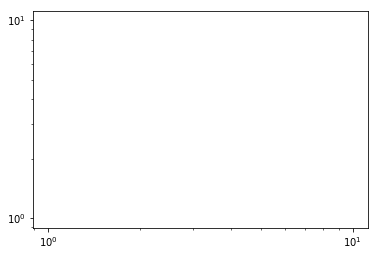

In [64]:
Ek = np.abs(np.fft.fftshift(np.fft.fftn(fluc[...,:-1,:-1,0]**2,axes=(1,2,3)),axes=(1,2,3)))

(Nt,Nz,Nx,Nt) = Ek.shape

kx = np.linspace(-Nx//2,Nx//2,Nx)
ky = np.linspace(-Ny//2,Ny//2,Ny)
kz = np.linspace(-Nz//2,Nz//2,Nz)

[Kx,Kz,Ky] = np.meshgrid(kx,kz,ky)
print(Kx.shape)

K = np.sqrt(Kx**2 + Ky**2 + Kz**2)

Klist = np.logspace(0,np.log10(np.max(K)),50)
E1d = []
for i,k0 in enumerate(Klist[:-1]):
    indices = np.logical_and(K>=Klist[i],K<Klist[i+1])
    #print(Ek[250,indices])
    val = np.nanmean(Ek[:,indices])
    E1d.append(val)

print(E1d)
plt.loglog(Klist[:-1],E1d,'ko-')
#plt.loglog(Klist,100*Klist**(-5./3),'r-')

In [266]:
a = np.ones((299,40))
np.transpose(np.tile(a,(23,63,1,1)),(2,3,0,1)).shape

(299, 40, 23, 63)

1475


[1200, 1750, -0.2, 1.05]

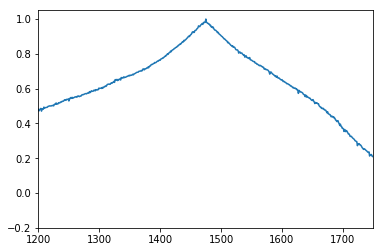

In [111]:
t = np.arange(0,2950,1)
n = len(t)
t0 = t[(n+1)//2]
print(t0)
ff2 = np.nanmean(fluc[t0,2:18,...,1]**2,axis=(0,1,2))
C = []
for tc in t:
#    print(tc)
    C.append(np.nanmean(fluc[tc,2:18,...,1]*fluc[t0,2:18,...,1],axis=(0,1,2))/ff2) 
plt.plot(t,C)
plt.axis([1200,1750,-0.2,1.05])

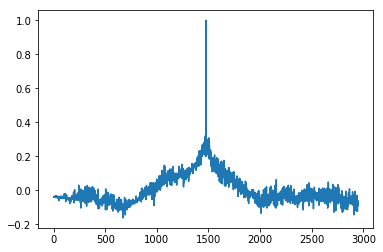

In [28]:
print(mean_flow.shape)
print(X[:,:,:].shape)

(40, 23, 63, 2)
(40, 23, 63)


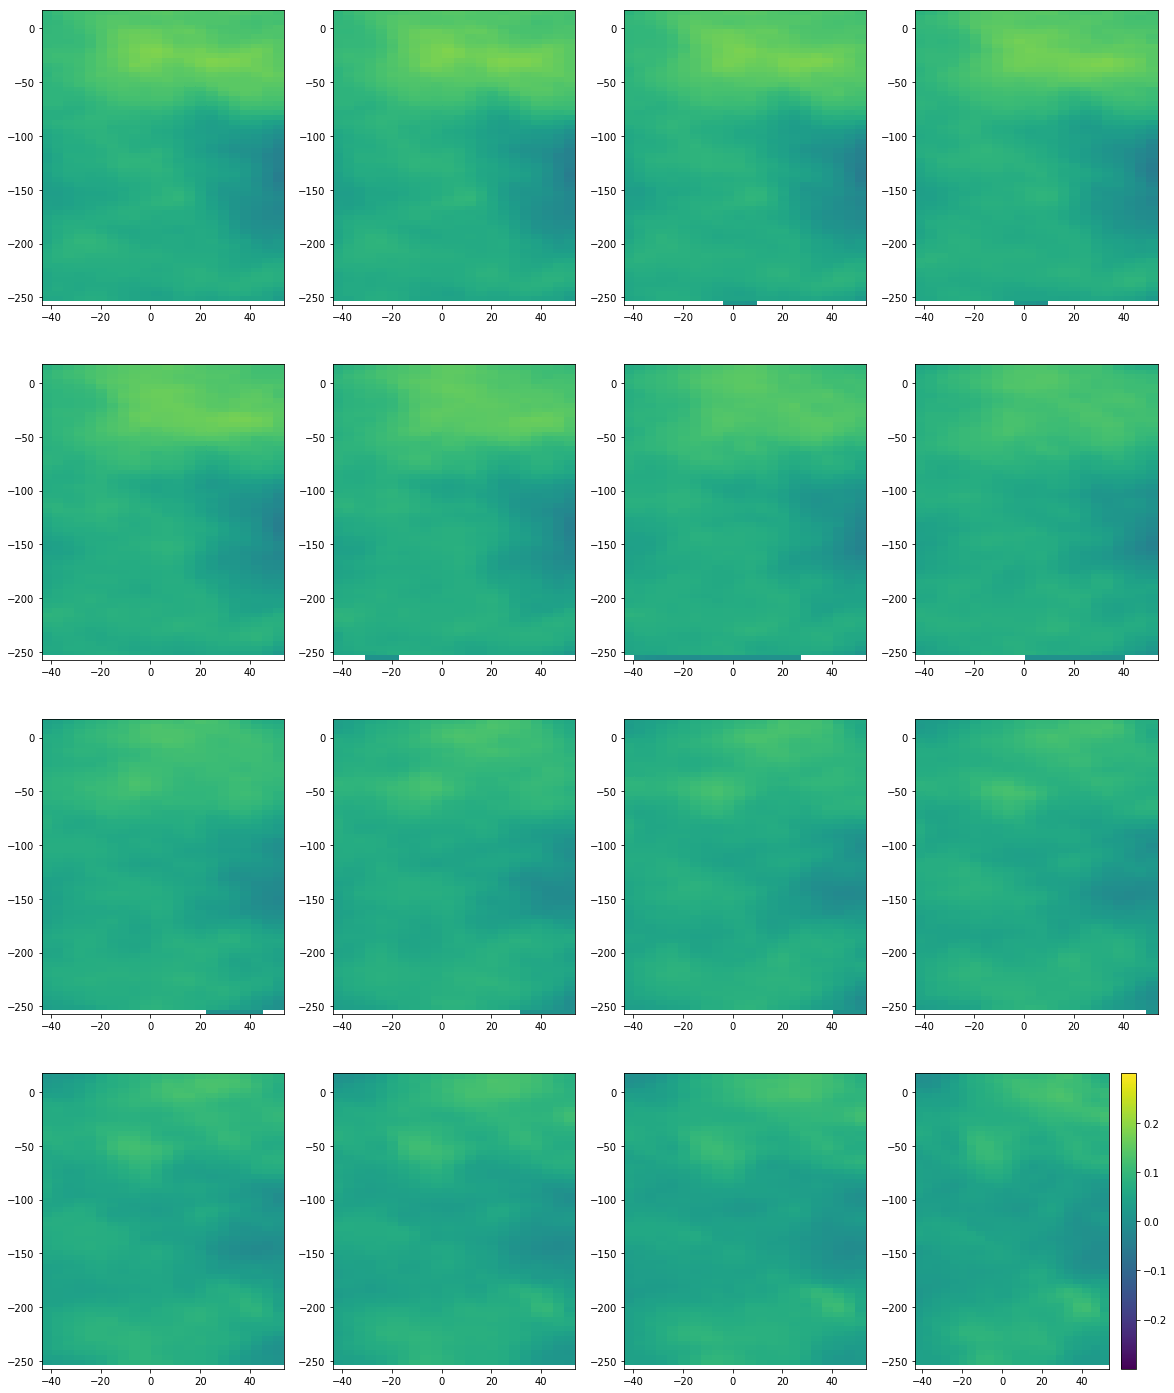

In [68]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],mean_flow[i*4+j,...,0],vmin=-0.3,vmax=0.3)
#    plt.colorbar()
plt.colorbar()

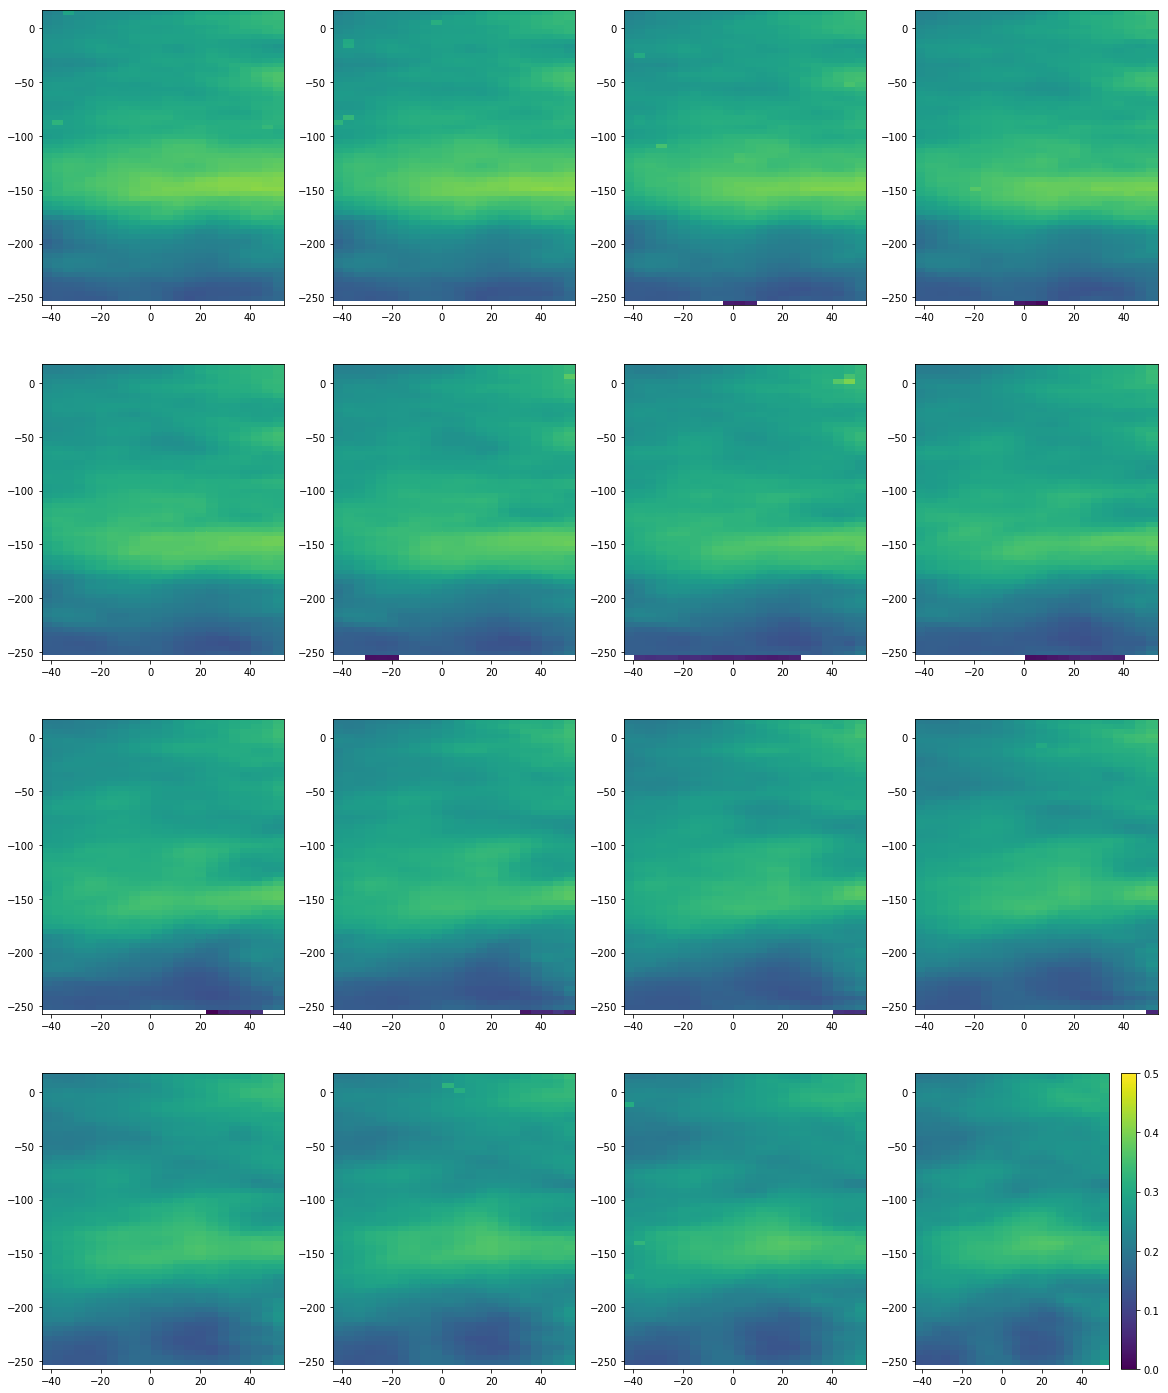

In [67]:
fig,axs=plt.subplots(4,4,figsize=(20,25))

for i in range(4):
    for j in range(4):
        plt.subplot(4,4,i*4+j+1)
        plt.pcolormesh(X[0,...],Y[0,...],u_rms[i*4+j,...],vmin=0,vmax=0.5)
plt.colorbar()

(23, 63)


/usr/lib/python3/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: Mean of empty slice
  


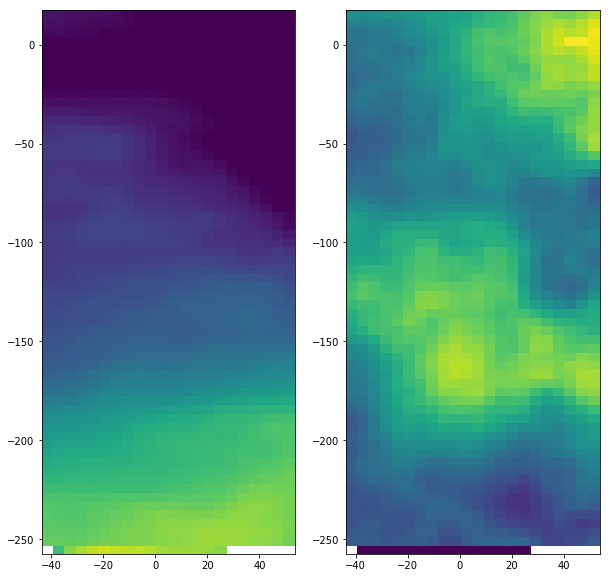

In [69]:
fig,axs=plt.subplots(1,2,figsize=(10,10))
print(mean_flow[10,...,0].shape)
axs[0].pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

axs[1].pcolormesh(X[0,...],Y[0,...],np.nanmean(fluc[:,6,...,0]**2,axis=0),vmin=0,vmax=0.05)
#plt.colorbar()

In [338]:
[R,Theta] = Smath.cart2pol(X,Z)
Ur = 2*mean_flow[...,1]*np.cos(Theta)  #coefficient to be compensated by the circle fraction avalaible, so the coeff is r dependent
Utheta = -2*mean_flow[...,1]*np.sin(Theta) #average along Theta still required

fur = interp.RegularGridInterpolator((z,x,y),Ur,method='linear',bounds_error=False,fill_value=np.nan)
fut = interp.RegularGridInterpolator((z,x,y),Utheta,method='linear',bounds_error=False,fill_value=np.nan)
fuz = interp.RegularGridInterpolator((z,x,y),mean_flow[...,0],method='linear',bounds_error=False,fill_value=np.nan)

#futheta = interp.RegularGridInterpolator(Utheta, values, method='linear', bounds_error=True, fill_value=nan)[source]


In [248]:
print(Ur.shape)

(16, 31, 63)


In [242]:
helicity = fur((R[:,:,40]*np.cos(Theta[:,:,]),x[5],y[40]))

array([-0.073379  , -0.07342986, -0.06604033, -0.06482857, -0.06580828,
       -0.06344544, -0.05669815, -0.04911837, -0.03393364, -0.02424669,
       -0.01768416, -0.01310526, -0.00867227, -0.00059881,  0.00032977,
        0.00036066])

/usr/lib/python3/dist-packages/ipykernel_launcher.py:30: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: Mean of empty slice
/usr/lib/python3/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: Mean of empty slice


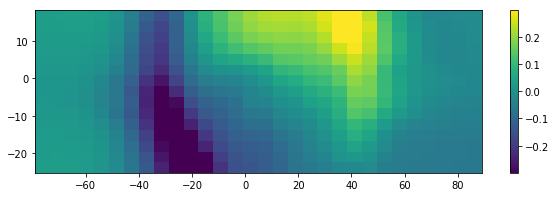

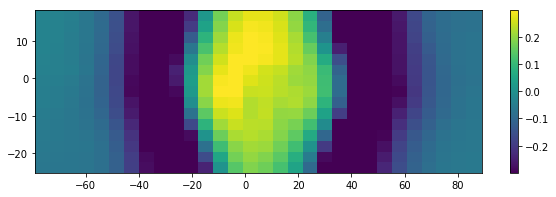

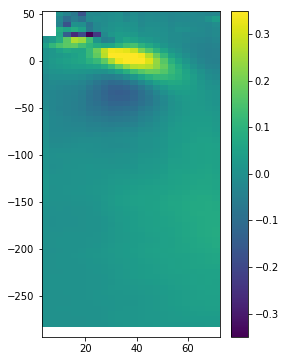

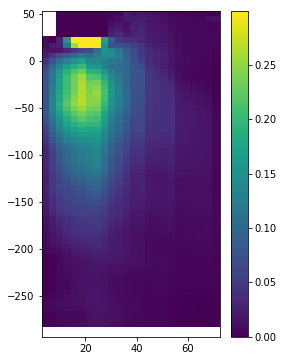

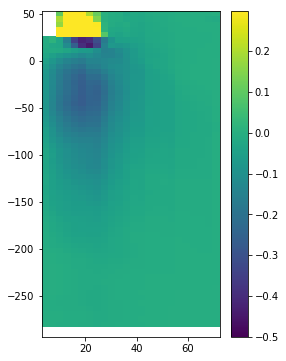

In [340]:
k =52

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,1],vmin=-0.3,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(10,3))
plt.pcolormesh(X[...,0],Z[...,0],mean_flow[...,k,0],vmin=-0.3,vmax=0.3)
plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Ur[...,k],vmin=-0.3,vmax=0.3)
dtheta = 2*np.pi/50
theta = np.arange(np.pi/2,2*np.pi+np.pi/2,dtheta)
dr = dz
R0 = np.arange(dz,dz*(Nx-5),dz)
Nr = len(R0)

#plt.plot(np.min(R0)*np.cos(theta),np.min(R0)*np.sin(theta),'r')
#plt.plot(np.max(R0)*np.cos(theta),np.max(R0)*np.sin(theta),'r')

UR = np.zeros((Ny,Nr))
UT = np.zeros((Ny,Nr))
UZ = np.zeros((Ny,Nr))

for i in range(len(y)):
    for j,r0 in enumerate(R0):
        UR[i,j] = np.nanmean(fur((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UT[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
        UZ[i,j] = np.nanmean(fut((r0*np.cos(theta),r0*np.sin(theta),y[i])))
    

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UR,vmin=-0.35,vmax=0.35)
plt.colorbar()


fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,-UT,vmin=0.,vmax=0.3)
plt.colorbar()

fig,axs=plt.subplots(1,1,figsize=(4,6))
plt.pcolormesh(Rf,Yf,UZ,vmin=-0.5,vmax=0.3)
plt.colorbar()

y
#fig,axs=plt.subplots(1,1,figsize=(10,3))
#plt.pcolormesh(X[...,0],Z[...,0],Utheta[...,k],vmin=-0.3,vmax=0.3)
#plt.colorbar()



#fig,axs=plt.subplots(1,1,figsize=(5,8))
#plt.pcolormesh(X[0,...],Y[0,...],mean_flow[6,...,1],vmin=-0.3,vmax=0.3)
#plt.colorbar()

In [192]:
#definition of mask
x0 = 175
y0 = 130
width = 120
height = 50

ValueError: cannot reshape array of size 31248 into shape (1,63)

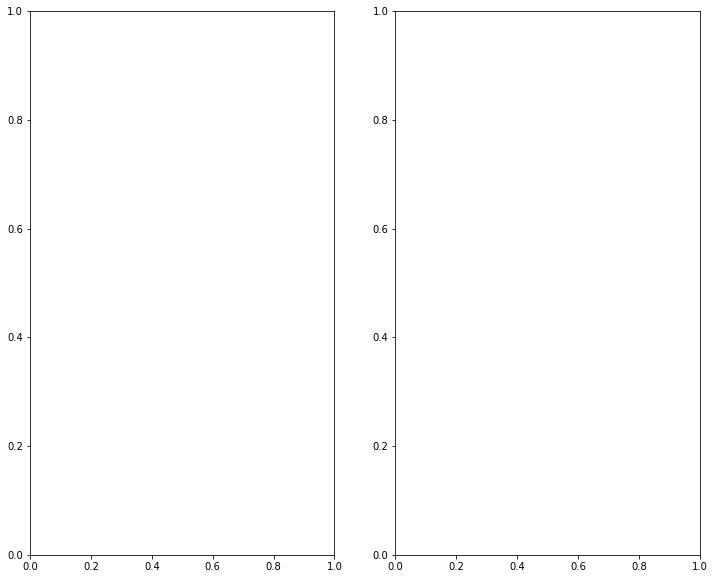

In [121]:
fig,axs=plt.subplots(1,2,figsize=(12,10)); axs=axs.flatten()
cax=[]
c=[]
j = 10
#for i in range(2):
#    divider = make_axes_locatable(axs[i])
#    cax.append(divider.append_axes('right', size='10%', pad=0.1))
    
for (i,data) in zip(range(2),[mean_speed[j,:,:],u_rms[j,:,:]]):
    #axs[i].clear()
    cb=axs[i].pcolormesh(X,Y,data,vmin=0,vmax=0.4)
#            cb=axs[i].pcolormesh(X,Y,ff[0,j,:,:,1],vmin=0,vmax=0.3)
#    fig.colorbar(cb)
#    c.append(fig.colorbar(cb, cax=cax[i], orientation='vertical'))

    axs[0].set_title(r'$y = '+str(int(z[j]))+' mm')
        #axs[1].set_title(r'$\bar u_{rms}$')

    axs[0].set_xlabel('$z$ (mm)')
    axs[i].set_xlabel('$x$ (mm)')
    #c[0].set_label(r'$\bar u$ (m/s)')
    #c[0].set_label(r'$\bar u_{rms}$ (m/s)')
    
    p=patches.Rectangle((x0,y0),width,height,facecolor='w',edgecolor='r')
    axs[i].add_patch(p)